# Install VS Code
Download VS Code:

Download Visual Studio from the Comcast Store

# Add Cody AI extension
Launch VS Code:

Open VS Code from your applications menu or desktop shortcut
Add the Cody AI extension:

In VS Code, click on the Extensions icon in the left sidebar (it looks like four squares)
In the search bar, type "Cody AI"
Look for the Cody AI extension by Sourcegraph
Click the "Install" button next to the Cody AI extension
Configure Cody AI:

After installation, you may need to sign in or configure the extension
Follow any prompts or instructions provided by the extension
Now you have VS Code installed with the Cody AI extension ready to use. You can start coding and leveraging the power of AI assistance in your development workflow.

 # Installing packages 

## Using the integrated terminal:

* Open the integrated terminal in VS Code (View > Terminal)
* Use pip to install packages:
* pip install package_name

### Packages:
* pm4py
* numpy  (usage: import numpy as np)
* seaborn (usage: import seaborn as sns)
* networkx (usage: import networkx as nx)
* pandas (usage: import pandas as pd)
* matplotlib (usage: import matplotlib.pyplot as plt)


## Using a requirements.txt file:

* Create a requirements.txt file in your project
* List all required packages in the file
* Run the following command in the terminal:
* pip install -r requirements.txt

## Creating a requirements.txt file
* To create a requirements.txt file, you can use the pip freeze command in your terminal or command prompt. Here's how you can do it:
* Open your terminal or command prompt.
* Navigate to the directory where your Python project is located.
* Run the following command:
    * pip freeze > requirements.txt
    
    * This command will create a requirements.txt file in the current directory with all the installed packages and their versions.
    * If you want to include only specific packages in the requirements.txt file, you can use the pip freeze command with the --exclude-editable flag. For example:

## Overview of Process Mining Algorithms
### Read the Docs
* https://processintelligence.solutions/static/api/2.7.11/index.html
### Run through of implementation including algorithmic details
* https://medium.com/wonderful-world-of-data-science/process-mining-with-python-tutorial-a-healthcare-application-part-2-4cf57053421f
* https://hussamalhumsi-21111.medium.com/process-mining-with-python-6ca1d733b3e6
### Similar but included Conformance Checking
* https://analyticsindiamag.com/ai-mysteries/guide-to-pm4py-python-framework-for-process-mining-algorithms/
### Deeper dive into the algorithms
* https://www.processmaker.com/blog/process-mining-algorithms-simply-explained/
### Navigating Process Mining: A Case study using pm4py 
* https://arxiv.org/pdf/2409.11294


# Imports

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# System utilities
import os

# Visualization
import seaborn as sns
import networkx as nx

# PM4PY Core Functions
from pm4py.objects.conversion.log import converter as log_converter
from pm4py import get_start_activities, get_end_activities

# Process Discovery
from pm4py import discover_directly_follows_graph, view_dfg
from pm4py import discover_petri_net_inductive
from pm4py import discover_process_tree_inductive
from pm4py import discover_petri_net_heuristics, view_petri_net
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.temporal_profile import algorithm as temporal_profile_discovery

# Filtering and Statistics
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.statistics.traces.generic.log import case_statistics

# Visualization Components
from pm4py.visualization.dfg import visualizer as dfg_visualizer
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.bpmn import visualizer as bpmn_visualizer
from pm4py import view_process_tree

# Organizational Mining
import pm4py.algo.organizational_mining.sna as sna_fact


## Pandas view options

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Read in sample data

In [ ]:
os.chdir(r'C:\Users\PATH_TO_PROJECT')
df = pd.read_excel('event_log_table_anon.xlsx')

# to export to excel
# df.to_excel('event_log_table_anon.xlsx', index=False)

#### Look at first X rows of data
- Defaults to five
- Syntax to customize df.head(3)

In [36]:
df.head()

id      start_datetime author.name          key     field fromString  \
0  17153005 2023-07-05 00:34:36      User_1  JIRA-552147   created        NaN   
1  17153005 2023-07-05 00:40:10      User_2  JIRA-552147    status       Open   
2  17161820 2023-07-05 16:57:01      User_3  JIRA-552147    status     Triage   
3  17161820 2023-07-05 16:57:01      User_3  JIRA-552147  assignee        NaN   
4  17161831 2023-07-05 16:59:46      User_3  JIRA-552147  assignee     User_3   

      toString     task_id            activity        end_datetime  \
0          NaN  17153005_0      Ticket Created 2023-07-05 00:40:10   
1       Triage  17153005_1       Ticket Triage 2023-07-05 16:57:01   
2  In Progress  17161820_2  Ticket In Progress 2023-07-05 16:58:01   
3       User_3  17161820_3     Ticket Assigned 2023-07-05 16:59:46   
4   Unassigned  17161831_1     Ticket Assigned 2023-11-05 14:02:13   

   event_duration_minutes  start_time_updated  \
0                    5.57 2023-07-05 00:34:36   
1                  976.85 2023-07-05 00:40:11   
2                    0.00 2023-07-05 16:57:01   
3                    2.75 2023-07-05 16:57:02   
4                 1262.45 2023-07-05 16:59:46   

                               upsert_id  
0   17153005_created_2023-07-05 00:34:36  
1    17153005_status_2023-07-05 00:40:10  
2    17161820_status_2023-07-05 16:57:01  
3  17161820_assignee_2023-07-05 16:57:01  
4  17161831_assignee_2023-07-05 16:59:46

#### List dataframe datatypes

In [37]:
df.dtypes

id                                 int64
start_datetime            datetime64[ns]
author.name                       object
key                               object
field                             object
fromString                        object
toString                          object
task_id                           object
activity                          object
end_datetime              datetime64[ns]
event_duration_minutes           float64
start_time_updated        datetime64[ns]
upsert_id                         object
dtype: object

#### Print out common dataframe measures

In [38]:
num_events = len(df)
num_cases = len(df['key'].unique())
avg_events_per_case = num_events / num_cases
print(f"Number of events: {num_events}")
print(f"Number of cases: {num_cases}")
print(f"Average events per case: {avg_events_per_case}")

Number of events: 26711
Number of cases: 3053
Average events per case: 8.749099246642647


In [39]:
import plotly.express as px

chart_df = df[df['start_datetime'] > '2023-08-01']
fig = px.histogram(chart_df, x='start_datetime', title='Histogram of Start Datetime')
fig.show()


### Required columns and their mapping
- "case:concept:name" == key  -- this is the case id
- "concept:name" == activity 
- "time:timestamp" == start_time_updated  
#
- "duration" == event_duration_minutes  -- manually created column
- "org:resource" = author.name

### Format dataframe

In [4]:
df.rename(columns={'key': 'case:concept:name', 
                   'start_time_updated': 'time:timestamp', 
                   'activity': 'concept:name',
                   'author.name':  'org:resource'}, inplace=True)

In [5]:
df.columns

Index(['id', 'start_datetime', 'org:resource', 'case:concept:name', 'field',
       'fromString', 'toString', 'task_id', 'concept:name', 'end_datetime',
       'event_duration_minutes', 'time:timestamp', 'upsert_id'],
      dtype='object')

## Creating the Event Log

In [6]:
# Convert the DataFrame to an event log
event_log = log_converter.apply(df)

### Exploring the Event Log 

In [ ]:
# create start and end activities objects
start_activities = get_start_activities(event_log)
end_activities = get_end_activities(event_log)
print('start: ', start_activities)
print('end:   ', end_activities)

start:  {'Ticket Created': 3053}
end:    {'Ticket Closed': 1749, 'Ticket Resolved': 617, 'Ticket Assigned': 319, 'Ticket Waiting on Customer': 194, 'Ticket Pending Vendor': 42, 'Ticket In Progress': 47, 'Ticket Pending Escalation': 1, 'Ticket Escalated': 3, 'Ticket Pending Followup': 25, 'Ticket Created': 53, 'Ticket Triage': 2, 'Ticket To Do': 1}


### Directly follows graph

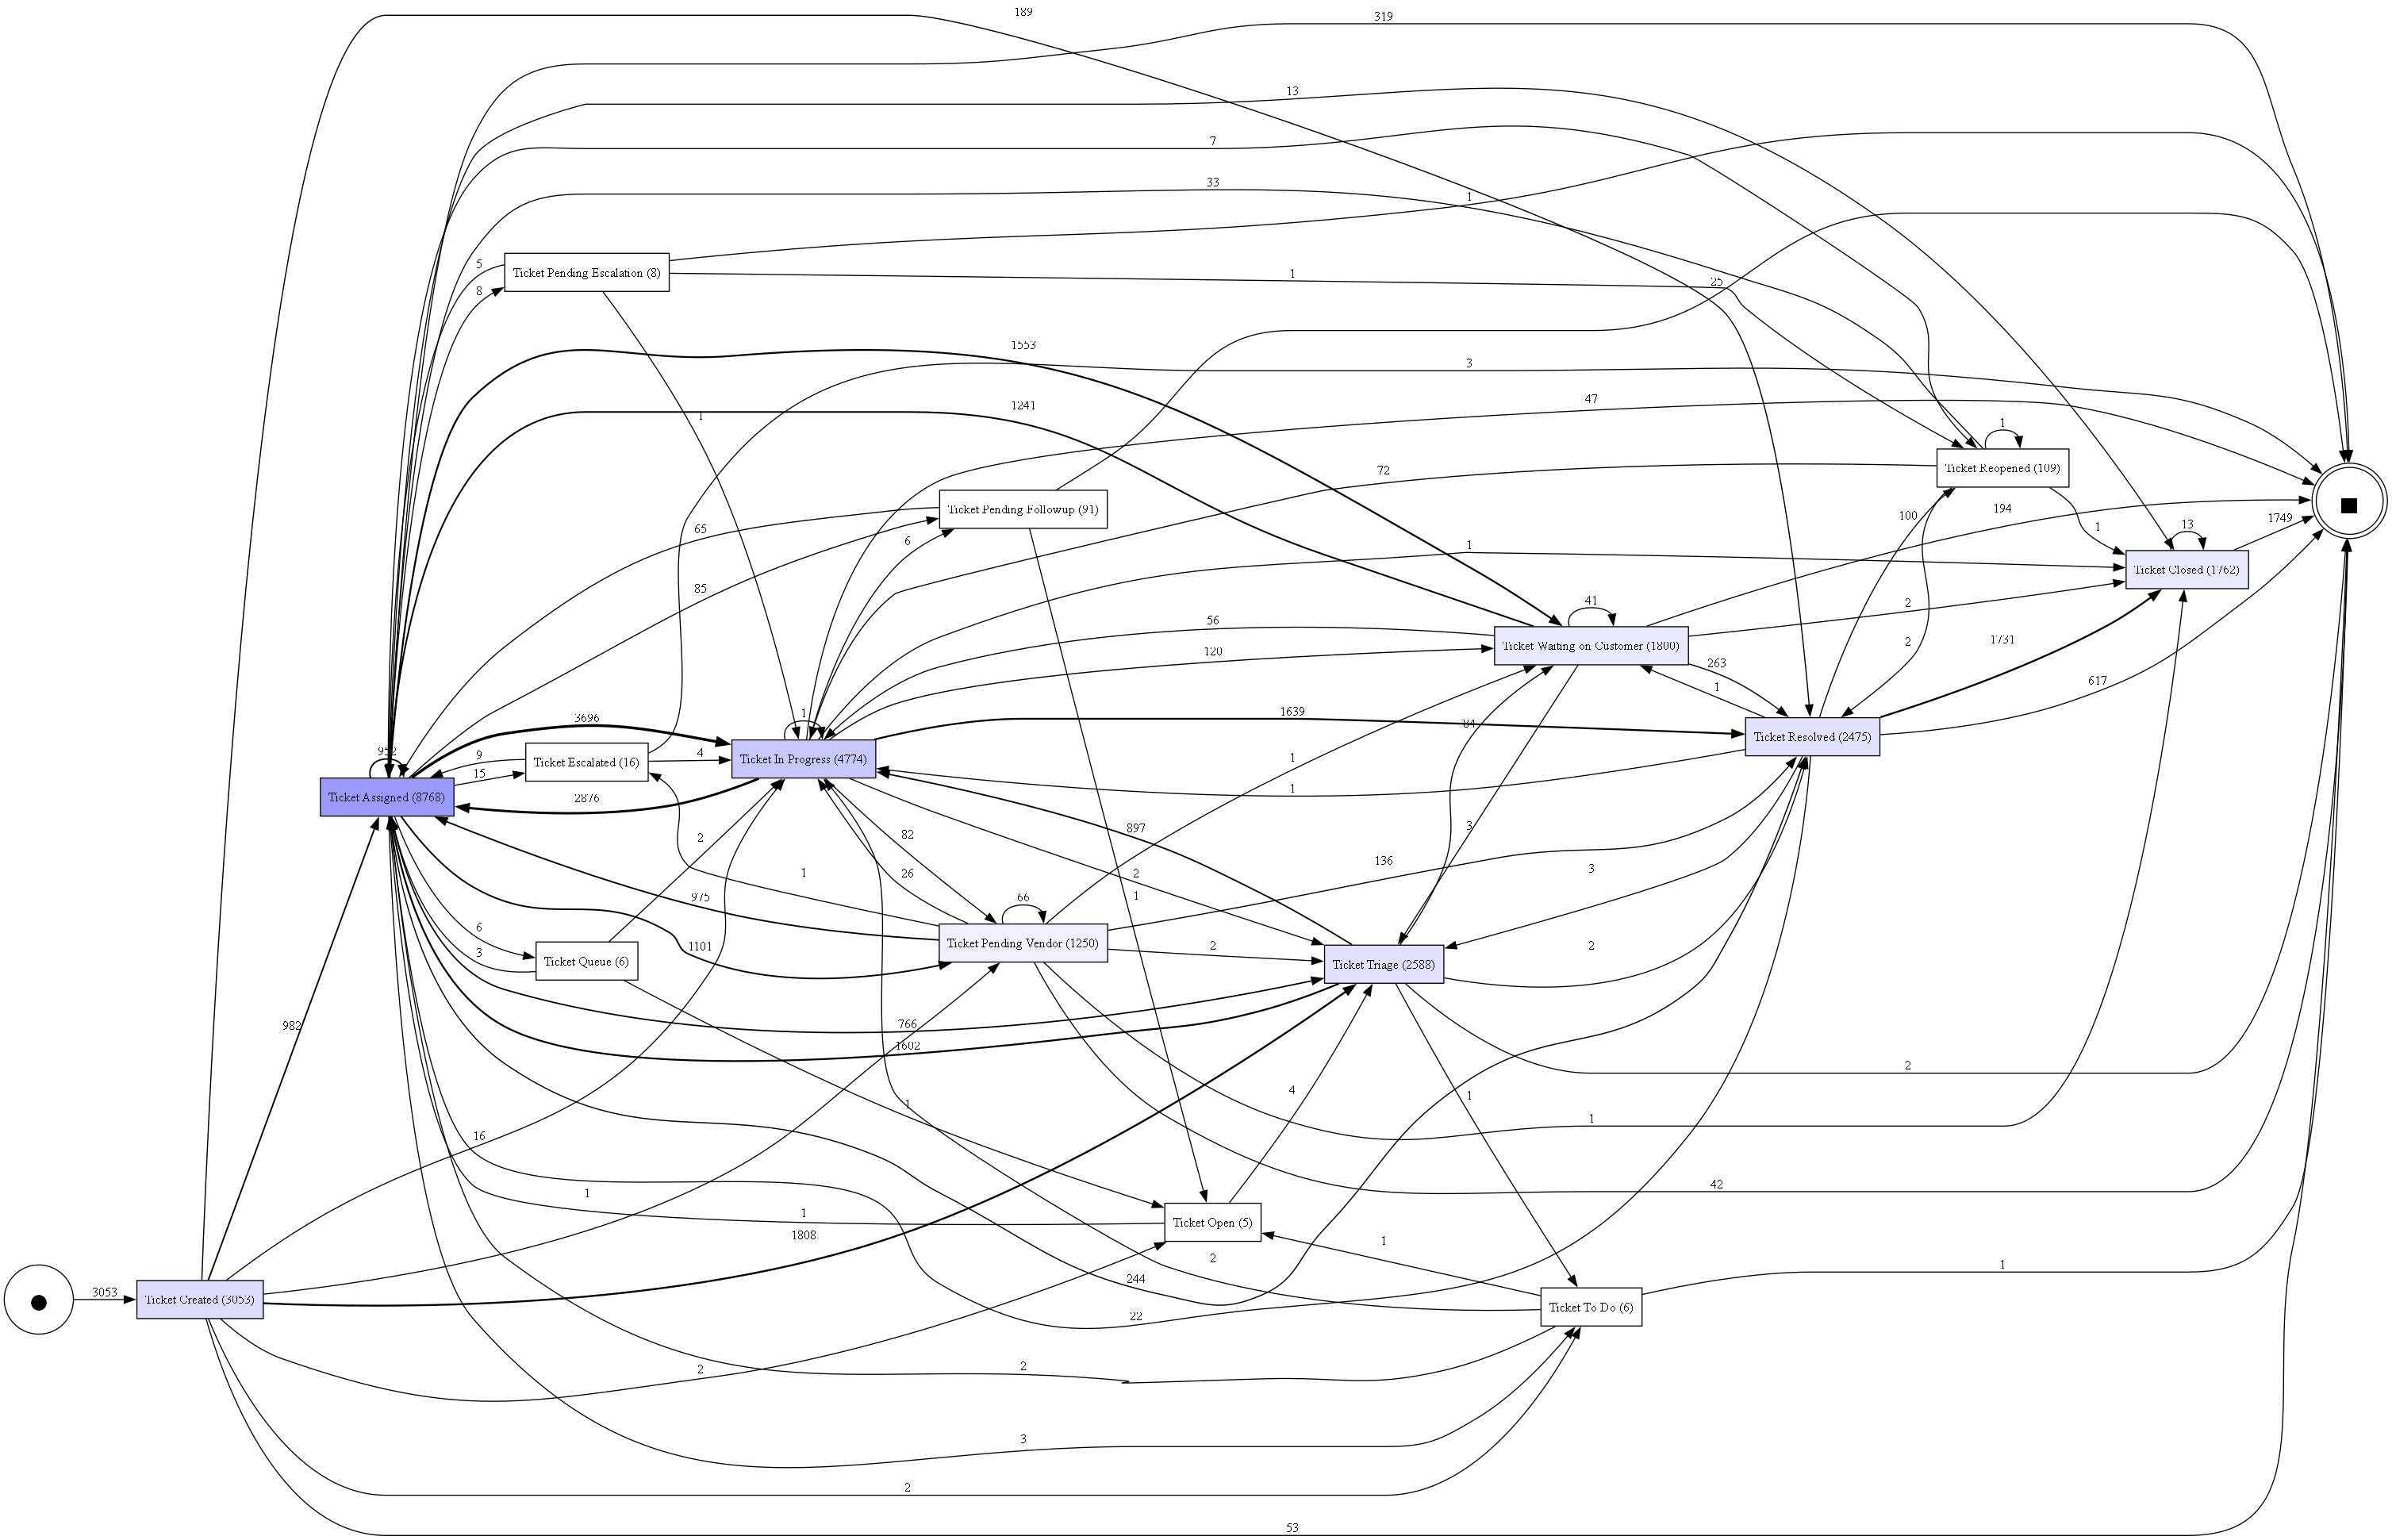

''

In [11]:
# from pm4py import discover_directly_follows_graph, view_dfg
# from pm4py.visualization.dfg import visualizer as dfg_visualizer

# First get the DFG and activities
dfg, start_activities, end_activities =discover_directly_follows_graph(event_log)

# Now visualize with the correct structure
view_dfg(dfg, start_activities=start_activities, end_activities=end_activities)

# Create the visualization with the correct parameters
parameters = {
    "format": "png",
    "start_activities": start_activities,
    "end_activities": end_activities
}

gviz_dfg = dfg_visualizer.apply(dfg, parameters=parameters)


# Save as PNG
dfg_visualizer.save(gviz_dfg, "process_model.png")

## Variants

In [ ]:
variants = variants_filter.get_variants(event_log)
print(f"We have {len(variants)} variants in our event log")

We have 628 variants in our event log


In [ ]:
# Get most common variants
most_common = case_statistics.get_variant_statistics(event_log)
top_variants = most_common[:5]  # View top 5 patterns

# Analyze variant frequencies
for variant in top_variants:
    print(f"Frequency: {variant['count']}")
    print(f"Path: {variant['variant']}")


Frequency: 223
Path: ('Ticket Created', 'Ticket Triage', 'Ticket Assigned', 'Ticket In Progress', 'Ticket Assigned', 'Ticket Pending Vendor', 'Ticket Assigned', 'Ticket In Progress', 'Ticket Resolved', 'Ticket Closed')
Frequency: 222
Path: ('Ticket Created', 'Ticket Triage', 'Ticket Assigned', 'Ticket In Progress', 'Ticket Assigned', 'Ticket Waiting on Customer', 'Ticket Assigned', 'Ticket In Progress', 'Ticket Resolved', 'Ticket Closed')
Frequency: 189
Path: ('Ticket Created', 'Ticket Triage', 'Ticket Assigned', 'Ticket In Progress', 'Ticket Resolved', 'Ticket Closed')
Frequency: 182
Path: ('Ticket Created', 'Ticket Assigned', 'Ticket Triage', 'Ticket In Progress', 'Ticket Resolved', 'Ticket Closed')
Frequency: 151
Path: ('Ticket Created', 'Ticket Triage', 'Ticket Assigned', 'Ticket In Progress', 'Ticket Assigned', 'Ticket Waiting on Customer', 'Ticket Resolved', 'Ticket Closed')


In [ ]:
# Get variants and their statistics
variants = variants_filter.get_variants(event_log)

# View top variants with frequencies
for variant, cases in list(variants.items())[:5]:
    print(f"\nNumber of cases following this path: {len(cases)}")
    print(f"Activities in sequence: {variant}")



Number of cases following this path: 1
Activities in sequence: ('Ticket Created', 'Ticket Triage', 'Ticket In Progress', 'Ticket Assigned', 'Ticket Assigned', 'Ticket Resolved', 'Ticket Assigned', 'Ticket Reopened', 'Ticket In Progress', 'Ticket Assigned', 'Ticket In Progress', 'Ticket Assigned', 'Ticket Waiting on Customer', 'Ticket Assigned', 'Ticket Waiting on Customer', 'Ticket Assigned', 'Ticket In Progress', 'Ticket Assigned', 'Ticket Pending Vendor', 'Ticket Assigned', 'Ticket In Progress', 'Ticket Assigned', 'Ticket Resolved', 'Ticket Closed')

Number of cases following this path: 10
Activities in sequence: ('Ticket Created', 'Ticket Triage', 'Ticket Assigned', 'Ticket In Progress', 'Ticket Assigned', 'Ticket Waiting on Customer', 'Ticket Assigned', 'Ticket In Progress', 'Ticket Assigned', 'Ticket Pending Vendor', 'Ticket Assigned', 'Ticket In Progress', 'Ticket Resolved', 'Ticket Closed')

Number of cases following this path: 222
Activities in sequence: ('Ticket Created', 'Ti

In [26]:
df.columns

Index(['id', 'start_datetime', 'org:resource', 'case:concept:name', 'field',
       'fromString', 'toString', 'task_id', 'concept:name', 'end_datetime',
       'event_duration_minutes', 'time:timestamp', 'upsert_id'],
      dtype='object')

### Create backup because this is a tutorial 
- in the real world you would create a dataframe with a new name to represent the change

In [31]:
original_df = df.copy()

##### Filter dataframe based on opening and closing activities

There are a large number of variants - further filter the dataframe to include only tickets that incldue both opening and closing activities

In [ ]:
# Get cases that start and end correctly
case_starts = df[df['concept:name'] == 'Ticket Created']["case:concept:name"].unique()
case_ends = df[df['concept:name'] == 'Ticket Closed']["case:concept:name"].unique()

# Find cases that have both correct start and end
complete_cases = set(case_starts).intersection(case_ends)

# Filter dataframe to keep only these complete cases
df = df[df['case:concept:name'].isin(complete_cases)]

# Recreate the event log
event_log = log_converter.apply(df)


In [33]:
print(len(original_df))
print(len(df))

26711
15883


### Note: if the dataset is too large, you can use a subset of the data

In [ ]:
# sub_df = df[['key', 'activity', 'start_time_updated', 'end_datetime']]
# # event_log.rename(columns={'ticket_id':'case:clientID'}, inplace=True)
# sub_df = pm4py.format_dataframe(dd, case_id='key', activity_key='activity', timestamp_key='start_time_updated')

# event_log = pm4py.convert_to_event_log(sub_df)

# Alpha Miner
the first algorithm that bridges the gap between event logs or observed data and the discovery of a process model. Alpha Miner can build process models in the form of Petri Net without using additional knowledge.

Some of the characteristics of the algorithm:
- Creates a Petri net model in which all the transitions are visible, unique, and correspond to the classified events.
- It cannot handle loops of length one or two.
- Invisible and duplicated tasks cannot be discovered.
- It does not handle noise well.

In [36]:
net, initial_marking, final_marking = alpha_miner.apply(event_log)

In [37]:
net

places: [ ({'Ticket Created', 'Ticket Pending Followup', 'Ticket Queue'}, {'Ticket Open'}), ({'Ticket Created'}, {'Ticket In Progress', 'Ticket Open'}), ({'Ticket Created'}, {'Ticket Resolved', 'Ticket Open'}), ({'Ticket Created'}, {'Ticket Triage'}), ({'Ticket Escalated', 'Ticket Created'}, {'Ticket In Progress'}), ({'Ticket Open'}, {'Ticket Triage'}), end, start ]
transitions: [ (Ticket Assigned, 'Ticket Assigned'), (Ticket Closed, 'Ticket Closed'), (Ticket Created, 'Ticket Created'), (Ticket Escalated, 'Ticket Escalated'), (Ticket In Progress, 'Ticket In Progress'), (Ticket Open, 'Ticket Open'), (Ticket Pending Followup, 'Ticket Pending Followup'), (Ticket Pending Vendor, 'Ticket Pending Vendor'), (Ticket Queue, 'Ticket Queue'), (Ticket Reopened, 'Ticket Reopened'), (Ticket Resolved, 'Ticket Resolved'), (Ticket Triage, 'Ticket Triage'), (Ticket Waiting on Customer, 'Ticket Waiting on Customer') ]
arcs: [ (Ticket Closed, 'Ticket Closed')->end, (Ticket Created, 'Ticket Created')->({'T

In [38]:
final_marking

['end:1']

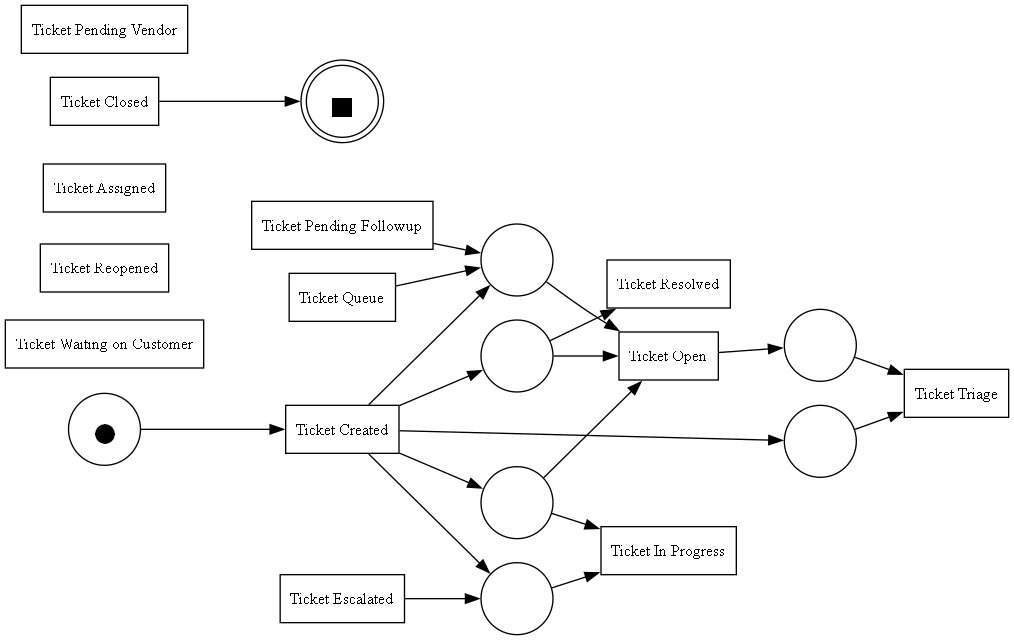

In [39]:
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

### Reading a Petri Net

A Petri net is a powerful graphical tool for modeling and analyzing processes. To read a Petri net effectively, focus on these key elements:

* Places (circles): Represent states or conditions in the process. They can hold tokens, which indicate the current state of the system.
* Transitions (rectangles or bars): Represent events or actions that cause the process to move from one state to another.
* Arcs (arrows): Connect places to transitions and transitions to places, showing the flow of the process.
* Tokens (small dots inside places): Indicate the current state of the process. The distribution of tokens across places is called the marking.
* Initial marking: The starting distribution of tokens, representing the initial state of the process.
* Final marking: The desired end state of the process.

To interpret the Petri net:
* Follow the flow of tokens through the net.
* A transition can fire when all its input places have tokens.
* When a transition fires, it consumes tokens from its input places and produces tokens in its output places.
* Parallel paths indicate concurrent activities.
* Choice points are represented by places with multiple outgoing arcs.

By analyzing the Petri net, you can understand the process flow, identify potential bottlenecks, and verify the correctness of the process model. This visualization provides valuable insights into the behavior and structure of complex systems or workflows.

## Adding data to Petri net
### Frequency

replaying log with TBR, completed traces ::   0%|          | 0/252 [00:00<?, ?it/s]

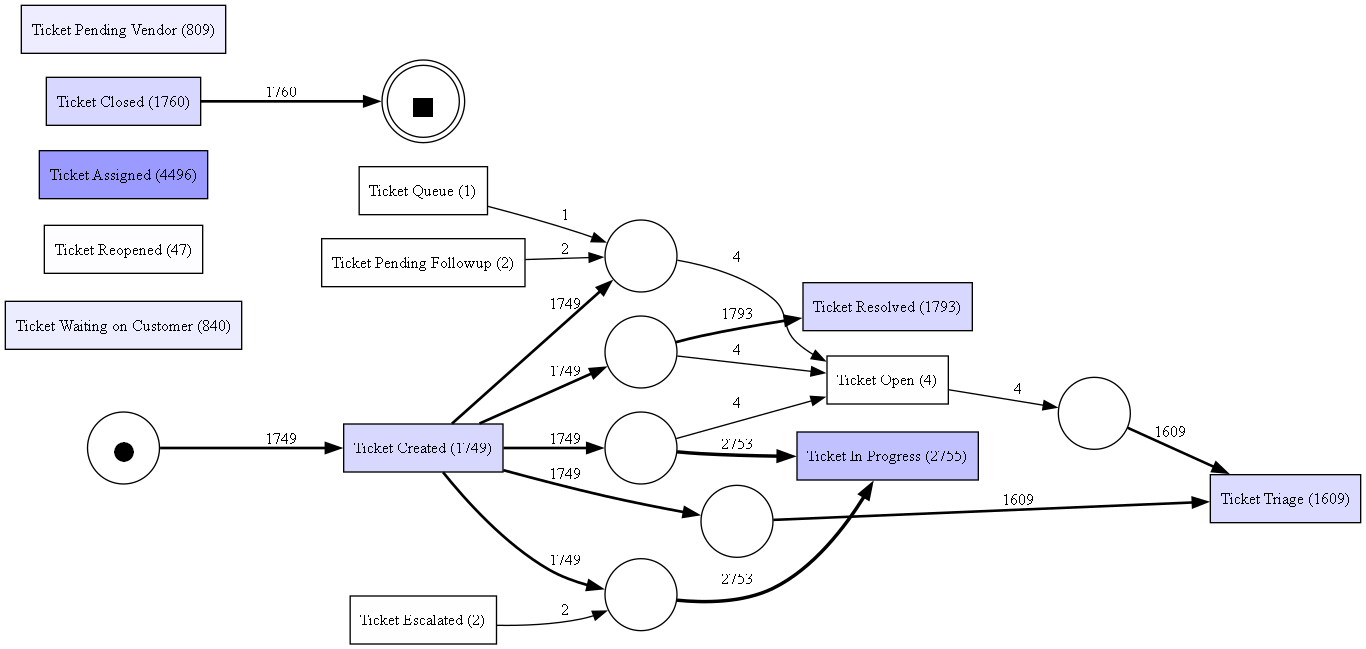

In [40]:
gviz = pn_visualizer.apply(net, initial_marking, final_marking,
                           variant=pn_visualizer.Variants.FREQUENCY,                             
                           log=event_log)
pn_visualizer.view(gviz)


# or save as png
# pn_visualizer.save(gviz, "inductive_frequency.png")

# Inductive
Inductive miner models usually make extensive use of hidden transitions, especially for skipping/looping on a portion on the model. Furthermore, each visible transition has a unique label (there are no transitions in the model that share the same label).

Two process models can be derived: Petri Net and Process Tree.

## Petri net model


replaying log with TBR, completed traces ::   0%|          | 0/252 [00:00<?, ?it/s]

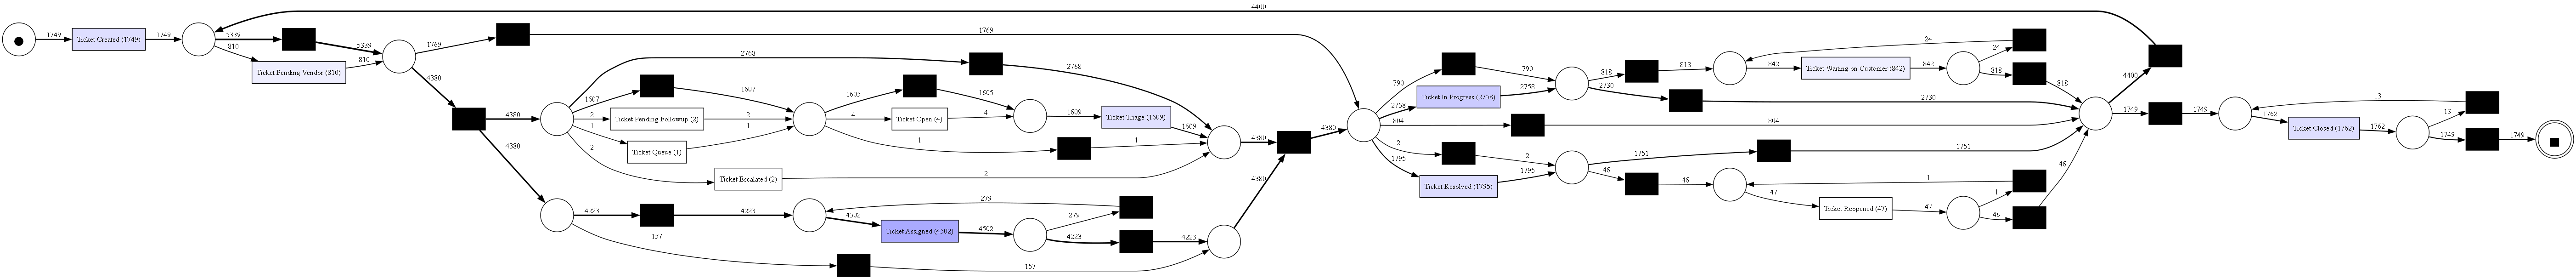

In [ ]:


net, initial_marking, final_marking = discover_petri_net_inductive(event_log)
gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=event_log)
pn_visualizer.view(gviz)

In [41]:
import pm4py

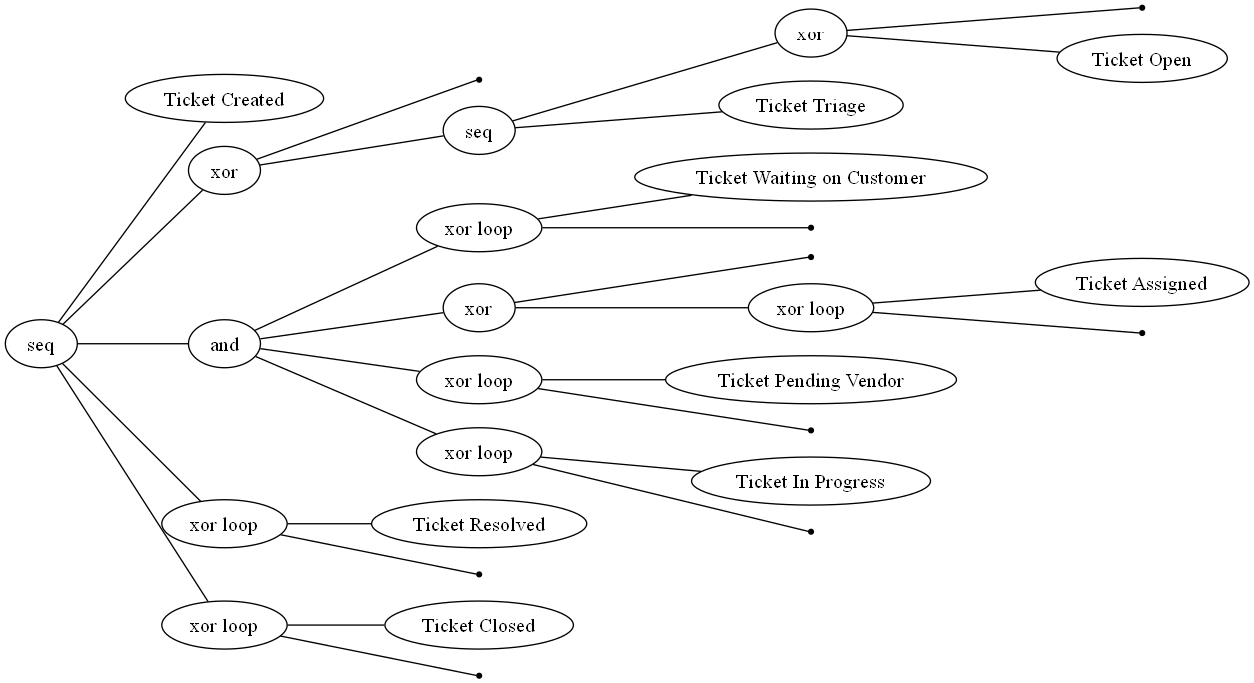

In [ ]:
tree = discover_process_tree_inductive(event_log, noise_threshold=.2)
view_process_tree(tree)

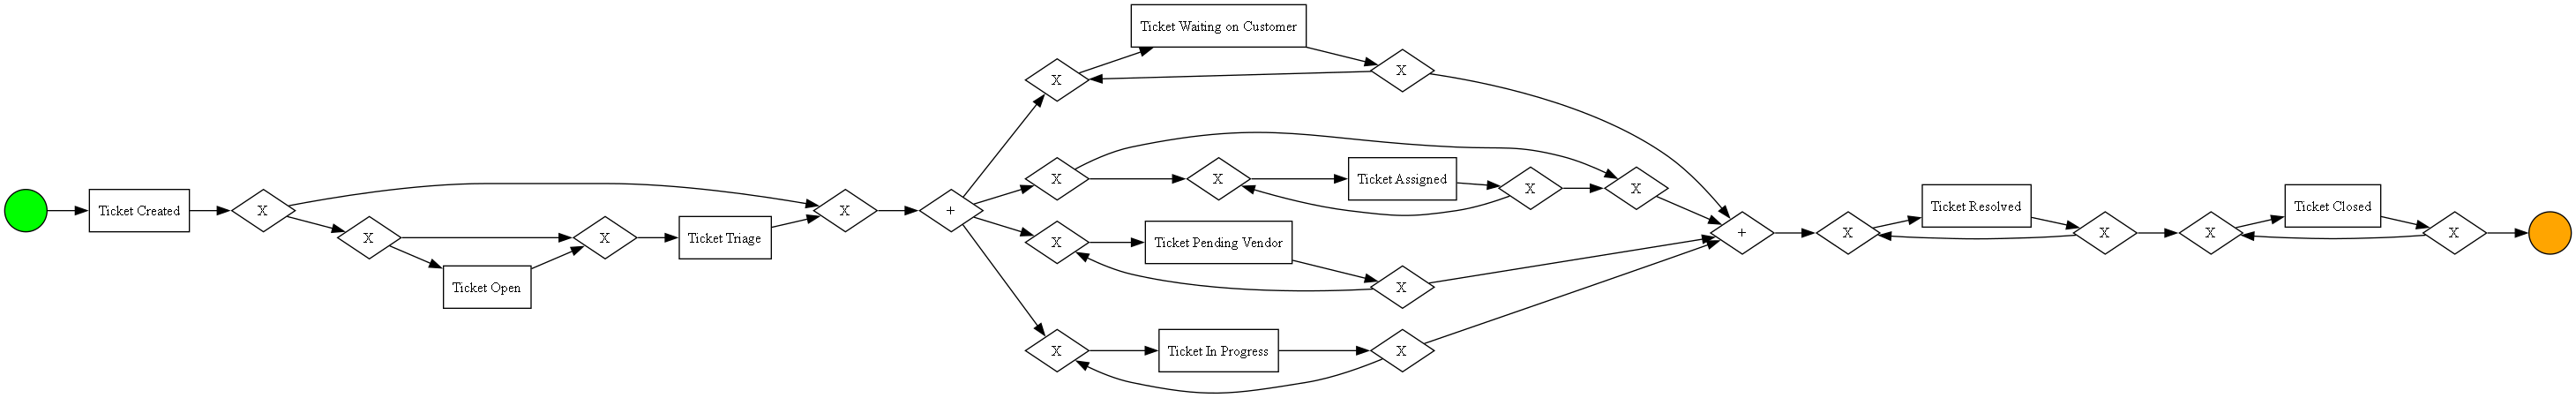

In [ ]:
# bpmn & viz bpmn
bpmn_model = convert_to_bpmn(tree)

gviz = bpmn_visualizer.apply(bpmn_model)
bpmn_visualizer.view(gviz)

# Heuristics
Heuristics Miner is an algorithm that acts on the Directly-Follows Graph, providing way to handle with noise and to find common constructs (dependency between two activities, AND). The output of the Heuristics Miner is an Heuristics Net, so an object that contains the activities and the relationships between them. The Heuristics Net can be then converted into a Petri net. 

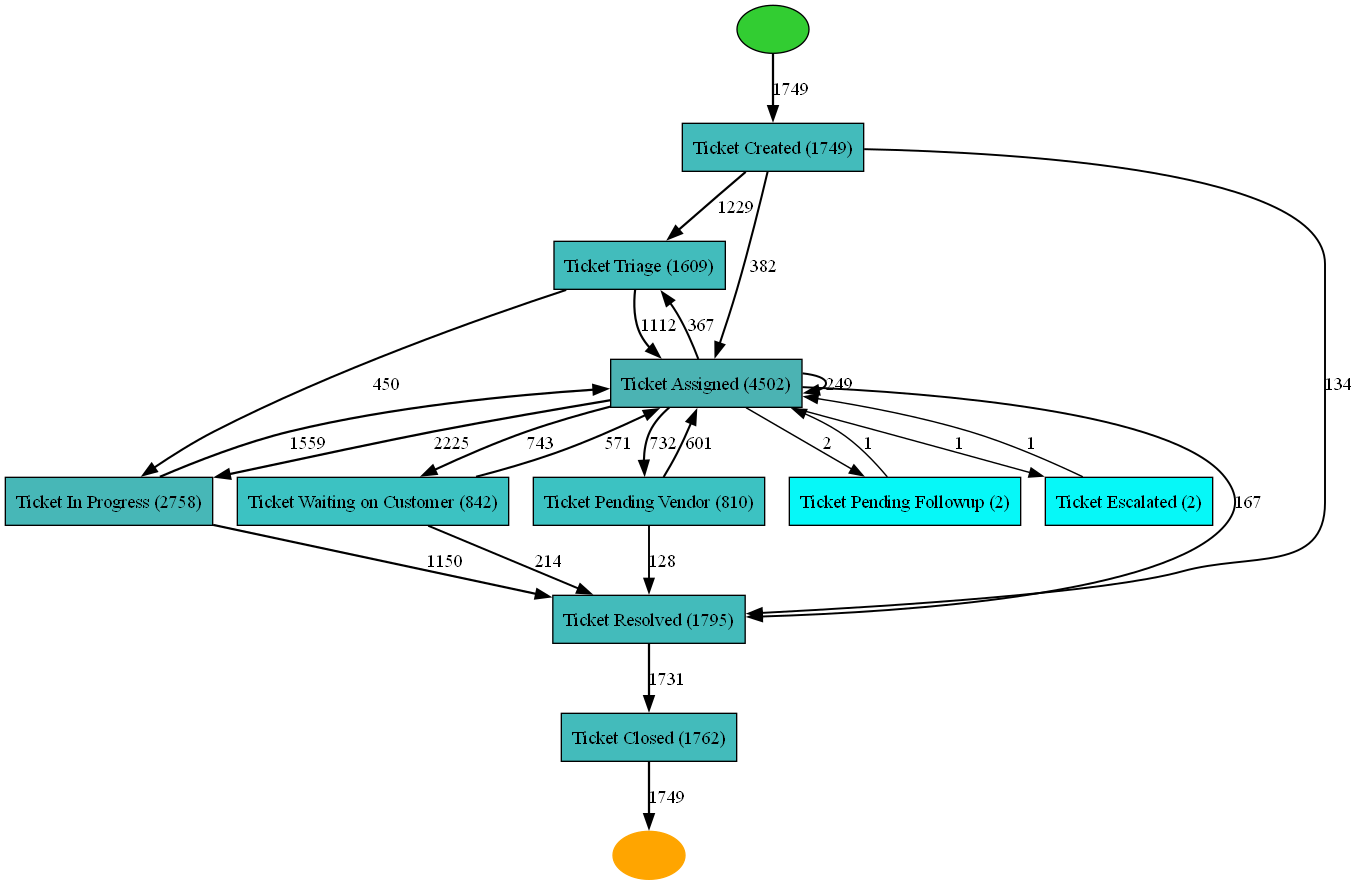

In [56]:
from pm4py import discover_heuristics_net, view_heuristics_net
heu_net = discover_heuristics_net(event_log, dependency_threshold=.99)
view_heuristics_net(heu_net)

Interpreting the Heuristics Graph:

Nodes: Each node represents an activity in your ticket lifecycle, such as "Ticket Created", "Ticket Assigned", or "Ticket Resolved".

Edges: The arrows between nodes show the flow between activities. Thicker edges indicate more frequent transitions.

Numbers on edges: These represent the frequency of transitions between activities. Higher numbers indicate more common paths in your process.

Colors: Often, colors are used to indicate the frequency or importance of activities or transitions. Warmer colors (reds, oranges) typically represent higher frequency or importance.

Start and end activities: Look for nodes with only outgoing or incoming edges to identify the typical start and end points of your process.

Loops: Cycles in the graph indicate repetitive processes, such as tickets being reopened or reassigned.

Parallel activities: Multiple outgoing edges from a single node suggest parallel or optional activities in your process.

By analyzing this graph, you can identify the most common paths in your ticket handling process, potential bottlenecks, and areas where the process might be optimized. It's a powerful tool for understanding and improving your workflow efficiency.

### Adjusting the Dependency Threshold
The dependency_threshold in pm4py.discover_heuristics_net is a parameter that controls the strength of dependencies between activities in the discovered heuristics net. It determines which connections between activities are included in the final model.

A higher threshold value results in a simpler model with fewer connections, as only the strongest dependencies are included. Conversely, a lower threshold produces a more complex model with more connections, capturing weaker dependencies between activities.

This parameter allows you to fine-tune the level of detail in your heuristics net, balancing between simplicity and completeness of the discovered process model. It's particularly useful when dealing with noisy event logs or when you want to focus on the most significant process paths.

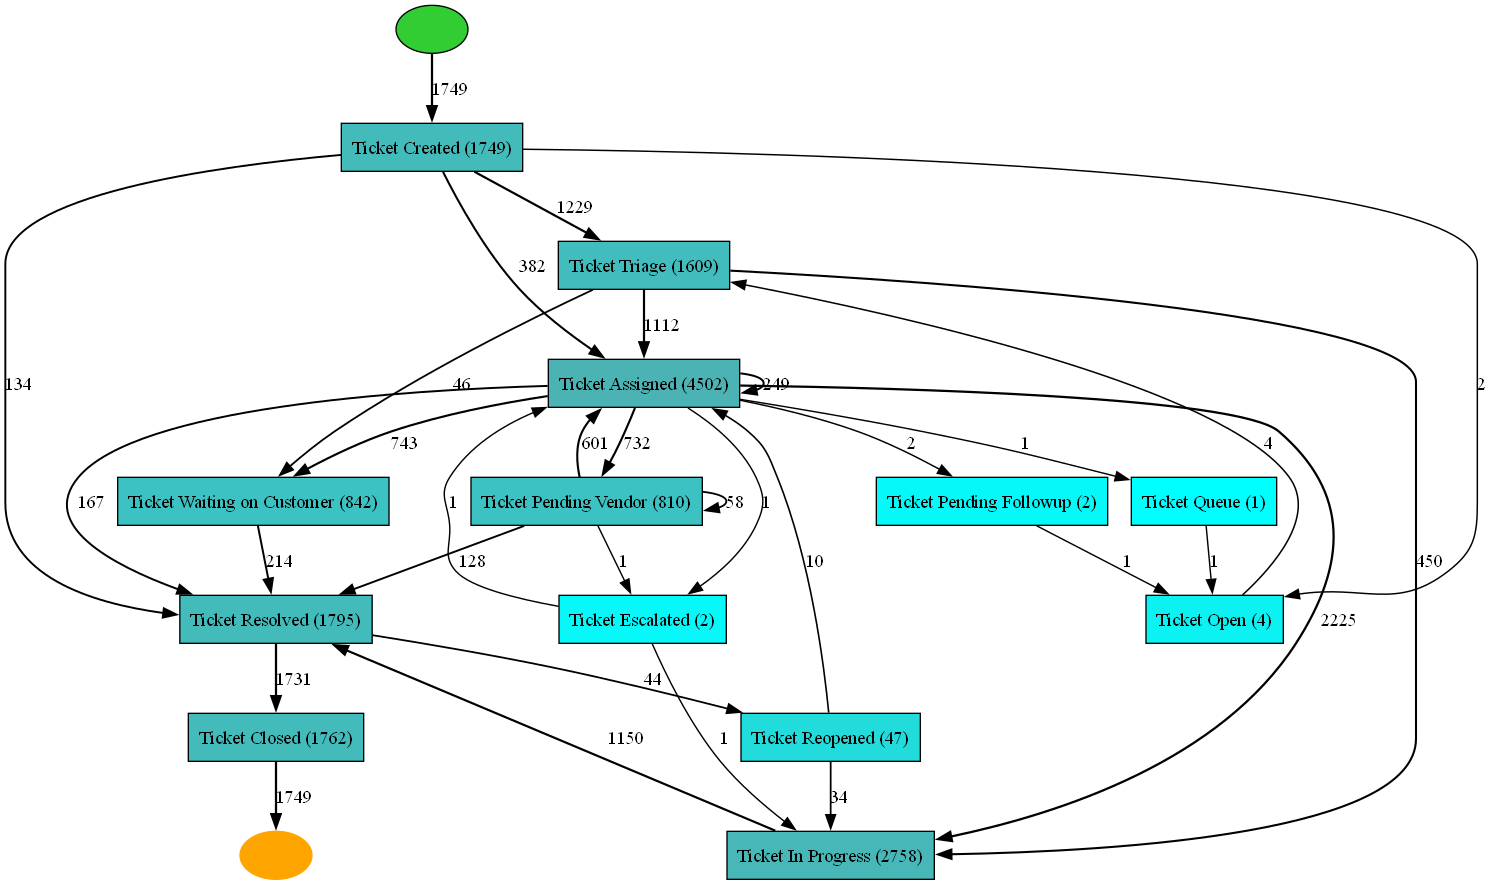

In [58]:
heu_net = discover_heuristics_net(event_log, dependency_threshold=0.1)
view_heuristics_net(heu_net)

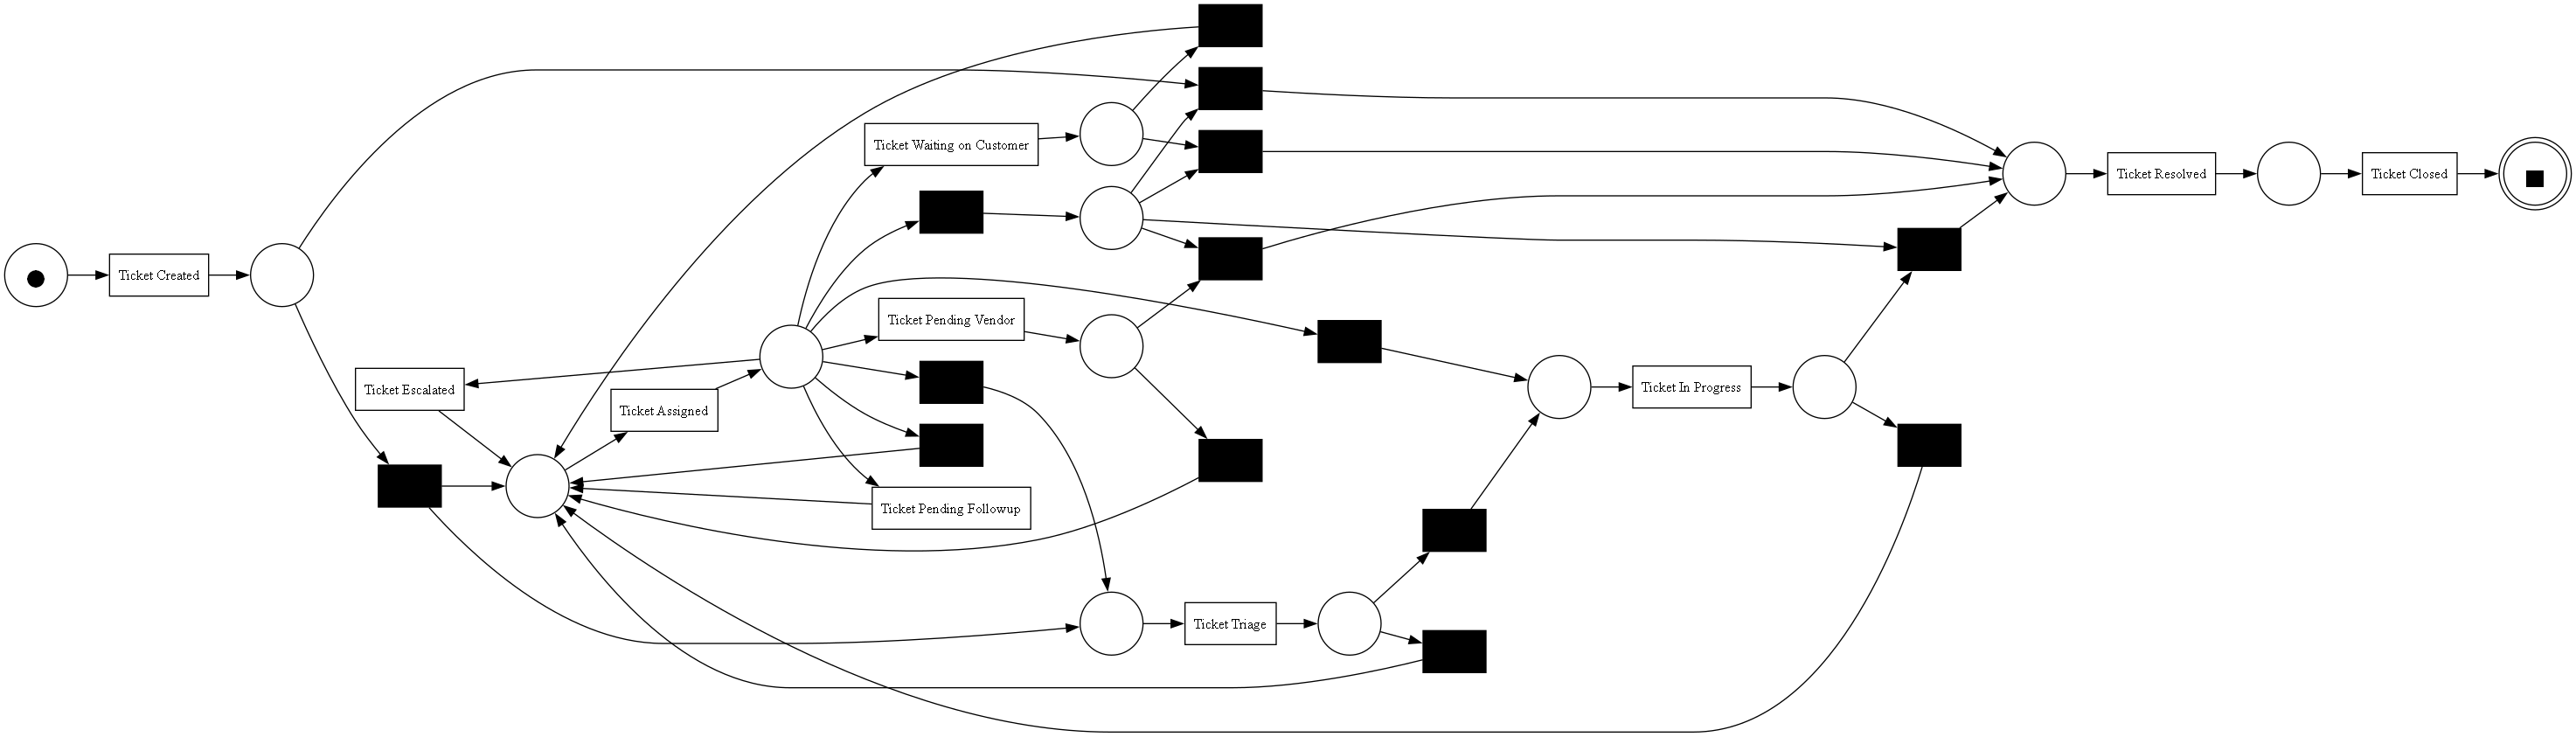

In [ ]:
net, im, fm = discover_petri_net_heuristics(event_log, dependency_threshold=.99)
view_petri_net(net, im, fm)

# Temporal Profile Discovery
The temporal_profile_discovery in PM4Py is a powerful tool for analyzing the time-related aspects of a process. It calculates the time intervals between different activities in the process, providing insights into the temporal behavior of the process.

The output of temporal_profile_discovery is a dictionary where the keys are pairs of activities (representing the transition from one activity to another), and the values are statistical summaries of the time intervals between these activities. These summaries typically include:

min: Minimum time interval
max: Maximum time interval
median: Median time interval
mean: Average time interval
std: Standard deviation of time intervals
To interpret the output:

Look at the activity pairs to understand the process flow.
Examine the statistical measures to gain insights into the timing between activities.
Use the min and max values to identify extreme cases.
Compare median and mean values to understand the typical time between activities.
Use the standard deviation to gauge the variability in timing.
This information is valuable for identifying bottlenecks, understanding process variability, and setting realistic expectations for process durations. It's a key component in process optimization and performance analysis.

In [ ]:
temporal_profile = temporal_profile_discovery.apply(event_log)
temporal_profile

{('Ticket Created', 'Ticket Triage'): (14255.160348042262, 29798.589311398566),
 ('Ticket Created', 'Ticket In Progress'): (208664.16751269036,
  991615.8059731052),
 ('Ticket Created', 'Ticket Assigned'): (201947.3658374056, 990806.1277232138),
 ('Ticket Created', 'Ticket Resolved'): (238236.75543175486,
  957822.0661579076),
 ('Ticket Created', 'Ticket Reopened'): (509479.2340425532,
  1592244.5504054169),
 ('Ticket Created', 'Ticket Waiting on Customer'): (313692.0712589074,
  1371601.9040785304),
 ('Ticket Created', 'Ticket Pending Vendor'): (119721.52592592593,
  827701.8127648627),
 ('Ticket Created', 'Ticket Closed'): (561180.1095346197, 1336473.298073333),
 ('Ticket Triage', 'Ticket In Progress'): (197108.4602189781,
  992709.7164461536),
 ('Ticket Triage', 'Ticket Assigned'): (211761.44980217607,
  1041327.5815917077),
 ('Ticket Triage', 'Ticket Resolved'): (242548.16242424241, 994250.074349432),
 ('Ticket Triage', 'Ticket Reopened'): (530343.7954545454, 1641631.1696351594),
 

### Summary of statistics without the filter 
- filter included only tickets that completed the process

- The replaying log message indicates that the algorithm is processing 935 variants of the process. This suggests a diverse set of paths through your JIRA ticket lifecycle.

- The dataframe shows individual events in the JIRA ticket lifecycle. Each row represents an action taken on a ticket, such as creation, status changes, and assignments.

- The 'start' and 'end' dictionaries show the frequency of different activities at the beginning and end of ticket lifecycles. For example, 'Ticket Created' is always the start (8797 times), while 'Ticket Closed' is the most common end (5740 times).

- The temporal profile output shows the time intervals between different activities. For instance, the mean time between 'Ticket Created' and 'Ticket Triage' is about 21,623 seconds (about 6 hours), with a standard deviation of 51,513 seconds.

- The median resolve time is about 7 minutes, which is quite fast for ticket resolution.

- The crosstab analysis shows the distribution of activities across different assignees, giving insights into workload distribution.

This data provides valuable insights into your JIRA ticket process, including:

- Typical paths tickets follow
- Time taken between different stages
- Workload distribution among team members
- Potential bottlenecks or delays in the process
- These insights can be used to optimize your ticket handling process, balance workloads, and identify areas for improvement in your team's efficiency.

In [62]:
first_five = list(set(df['org:resource'].tolist()))[0:5]
dd = df[df['org:resource'].isin(first_five)]

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the crosstab
crosstab = pd.crosstab(dd['concept:name'], dd['org:resource'], normalize='index')
crosstab


org:resource                agado440  aphon799  kdalvi410  nikko.cabula  \
concept:name                                                              
Ticket Assigned                  0.0  0.015625   0.562500      0.140625   
Ticket In Progress               0.0  0.034483   0.448276      0.137931   
Ticket Pending Vendor            0.0  0.000000   0.600000      0.200000   
Ticket Reopened                  1.0  0.000000   0.000000      0.000000   
Ticket Resolved                  0.0  0.142857   0.142857      0.000000   
Ticket Triage                    0.0  0.000000   0.727273      0.090909   
Ticket Waiting on Customer       0.0  0.000000   0.454545      0.181818   

org:resource                ssarka097  
concept:name                           
Ticket Assigned              0.281250  
Ticket In Progress           0.379310  
Ticket Pending Vendor        0.200000  
Ticket Reopened              0.000000  
Ticket Resolved              0.714286  
Ticket Triage                0.181818  
Ticket Waiting on Customer   0.363636

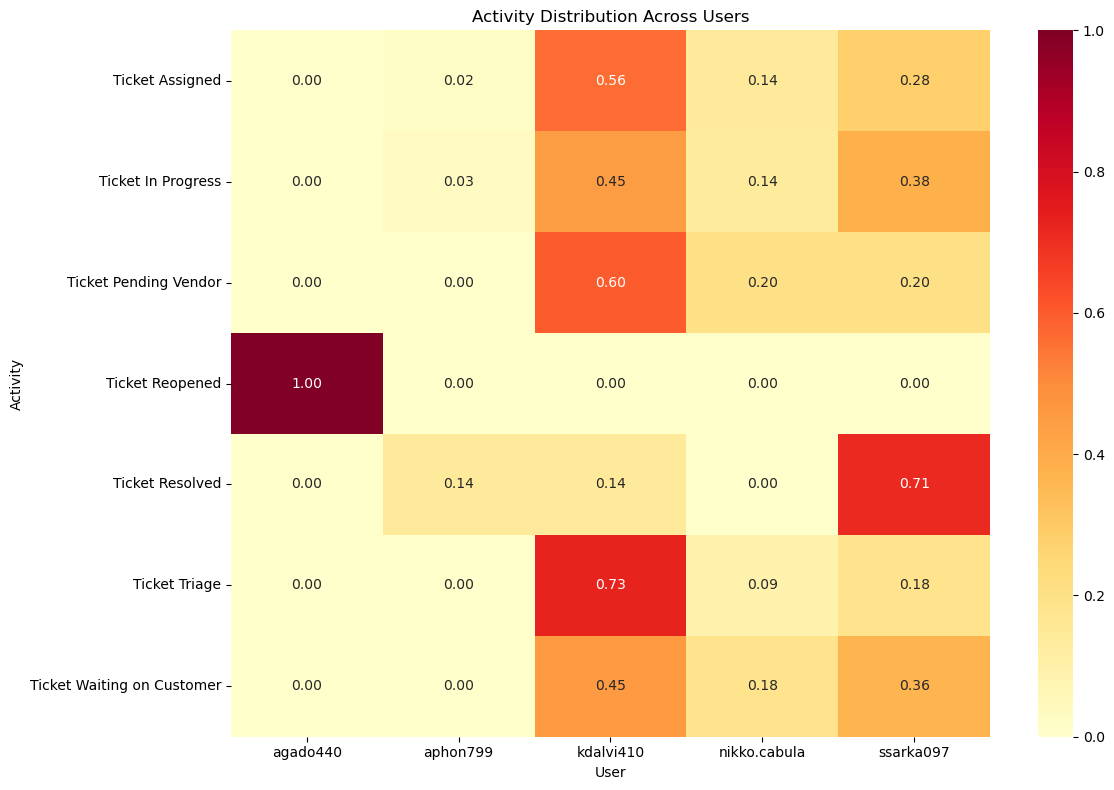

In [ ]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Activity Distribution Across Users')
plt.ylabel('Activity')
plt.xlabel('User')
plt.tight_layout()
plt.show()


### Calculating Time Intervals
We use the temporal_profile_discovery algorithm to calculate the time intervals between different activities in our process.

In [66]:
from pm4py.algo.discovery.temporal_profile import algorithm as temporal_profile_discovery

temporal_profile = temporal_profile_discovery.apply(event_log)

### Interpreting the Results 
The output is a dictionary where keys are pairs of activities, and values are statistical summaries of time intervals between these activities.

In [67]:
temporal_profile

{('Ticket Created', 'Ticket Triage'): (14255.160348042262, 29798.589311398566),
 ('Ticket Created', 'Ticket In Progress'): (208664.16751269036,
  991615.8059731052),
 ('Ticket Created', 'Ticket Assigned'): (201947.3658374056, 990806.1277232138),
 ('Ticket Created', 'Ticket Resolved'): (238236.75543175486,
  957822.0661579076),
 ('Ticket Created', 'Ticket Reopened'): (509479.2340425532,
  1592244.5504054169),
 ('Ticket Created', 'Ticket Waiting on Customer'): (313692.0712589074,
  1371601.9040785304),
 ('Ticket Created', 'Ticket Pending Vendor'): (119721.52592592593,
  827701.8127648627),
 ('Ticket Created', 'Ticket Closed'): (561180.1095346197, 1336473.298073333),
 ('Ticket Triage', 'Ticket In Progress'): (197108.4602189781,
  992709.7164461536),
 ('Ticket Triage', 'Ticket Assigned'): (211761.44980217607,
  1041327.5815917077),
 ('Ticket Triage', 'Ticket Resolved'): (242548.16242424241, 994250.074349432),
 ('Ticket Triage', 'Ticket Reopened'): (530343.7954545454, 1641631.1696351594),
 

In [68]:

for (act1, act2), stats in temporal_profile.items():
    print(f"From {act1} to {act2}:")
    print(f"  Mean time: {stats[0]} seconds")
    print(f"  Standard deviation: {stats[1]} seconds")

From Ticket Created to Ticket Triage:
  Mean time: 14255.160348042262 seconds
  Standard deviation: 29798.589311398566 seconds
From Ticket Created to Ticket In Progress:
  Mean time: 208664.16751269036 seconds
  Standard deviation: 991615.8059731052 seconds
From Ticket Created to Ticket Assigned:
  Mean time: 201947.3658374056 seconds
  Standard deviation: 990806.1277232138 seconds
From Ticket Created to Ticket Resolved:
  Mean time: 238236.75543175486 seconds
  Standard deviation: 957822.0661579076 seconds
From Ticket Created to Ticket Reopened:
  Mean time: 509479.2340425532 seconds
  Standard deviation: 1592244.5504054169 seconds
From Ticket Created to Ticket Waiting on Customer:
  Mean time: 313692.0712589074 seconds
  Standard deviation: 1371601.9040785304 seconds
From Ticket Created to Ticket Pending Vendor:
  Mean time: 119721.52592592593 seconds
  Standard deviation: 827701.8127648627 seconds
From Ticket Created to Ticket Closed:
  Mean time: 561180.1095346197 seconds
  Standar

Identifying Process Bottlenecks: Look for activity pairs with high median or mean times. These could indicate bottlenecks in your process.

Analyzing Process Variability: High standard deviations suggest inconsistent processing times, which might indicate process inefficiencies or complexities.

Visualizing Temporal Profiles: Create a heatmap to visualize the median times between activities:

       Activity 1          Activity 2      Mean Time
0  Ticket Created       Ticket Triage   14255.160348
1  Ticket Created  Ticket In Progress  208664.167513
2  Ticket Created     Ticket Assigned  201947.365837
3  Ticket Created     Ticket Resolved  238236.755432
4  Ticket Created     Ticket Reopened  509479.234043


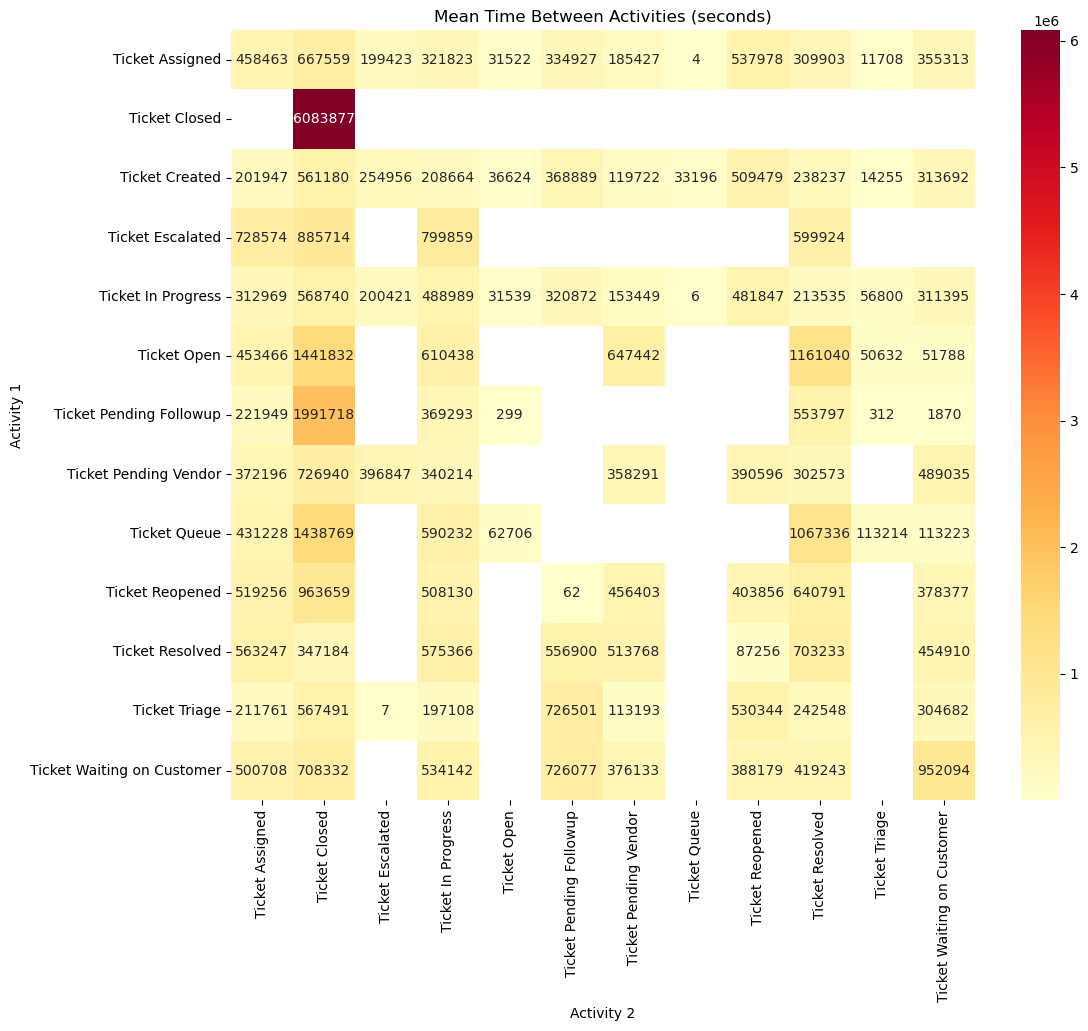

In [69]:
df_temporal = pd.DataFrame([(act1, act2, stats[0]) for (act1, act2), stats in temporal_profile.items()],
                           columns=['Activity 1', 'Activity 2', 'Mean Time'])
print(df_temporal.head())
df_pivot = df_temporal.pivot(index='Activity 1', columns='Activity 2', values='Mean Time')

plt.figure(figsize=(12, 10))
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Mean Time Between Activities (seconds)')
plt.show()

## Handover Process Mapping
The visualizations below show:
- Nodes: Team members/resources
- Edges: Work handovers between people
- Edge thickness: Frequency of handovers
- Edge labels: Handover weights

You can adjust the thresholds to focus on:
- Stronger collaborations (increase threshold)
- More detailed connections (decrease threshold)

This gives you a clear picture of how work flows between team members in your process.

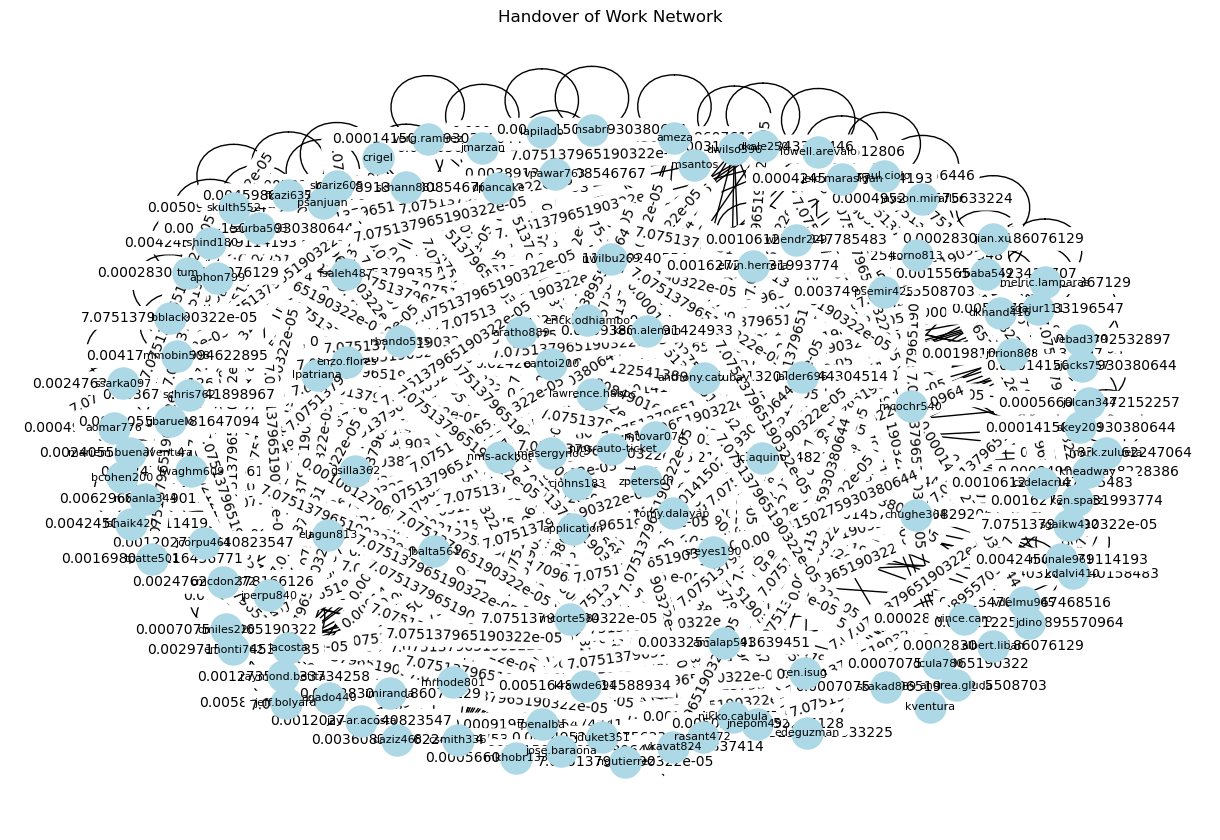

In [70]:
from pm4py.algo.organizational_mining.sna import algorithm as sna_algorithm
import matplotlib.pyplot as plt

# Convert relevant attributes to a consistent type (e.g., string)
for trace in event_log:
    for event in trace:
        for key in event.keys():
            event[key] = str(event[key])

# Now apply the handover network algorithm
handover_nw = sna_algorithm.apply(event_log, variant=sna_algorithm.Variants.HANDOVER_LOG)

network_data = handover_nw.__dict__['connections']

G = nx.Graph()
for (resource1, resource2), weight in network_data.items():
    if resource1 != 'nan' and resource2 != 'nan':
        G.add_edge(resource1, resource2, weight=weight)

pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=8)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Handover of Work Network')
plt.show()

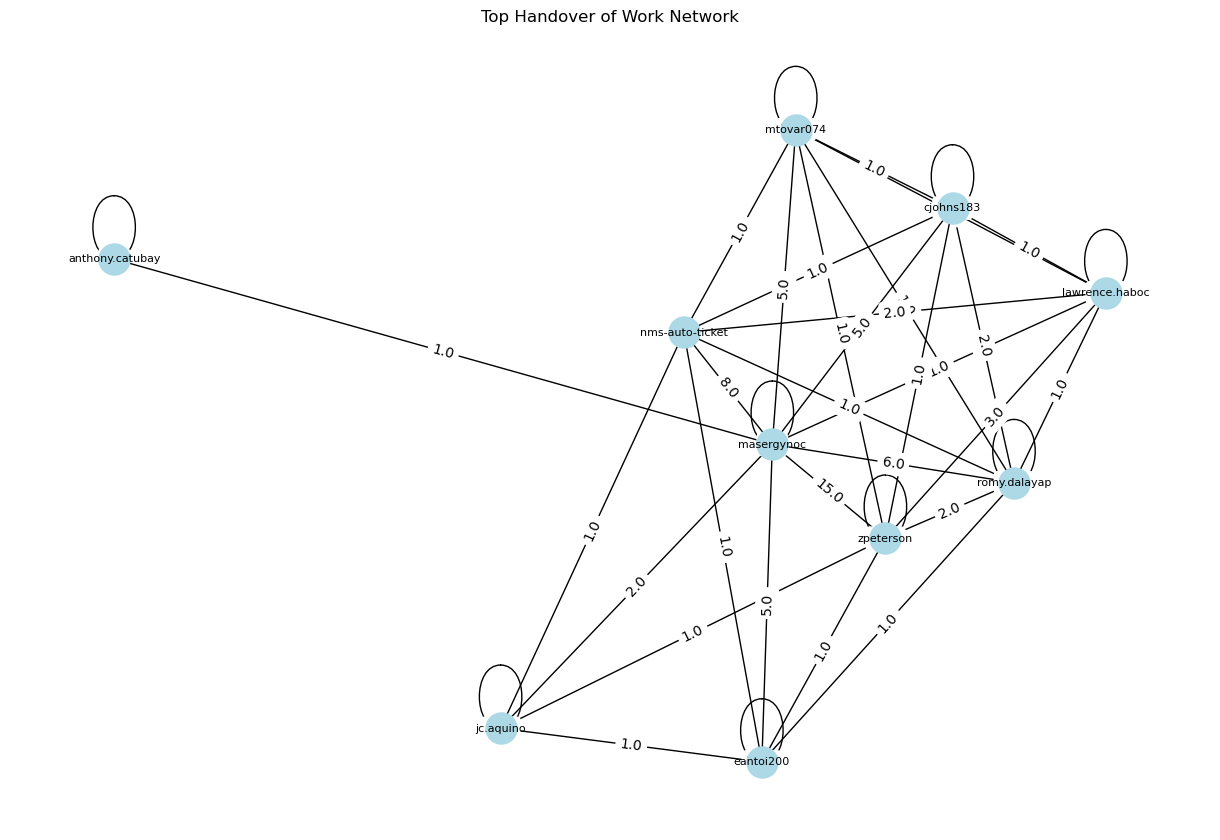

In [136]:
# Scale weights to percentages (0-100)
network_data = handover_nw.__dict__['connections']
scaled_data = {k: round(v * 100, 1) for k, v in network_data.items() if 'nan' not in k}

# Or scale to whole numbers (1-15)
scaled_data = {k: round(v * 1000, 0) for k, v in network_data.items() if 'nan' not in k}

# Use scaled data in visualization
G = nx.Graph()
for (resource1, resource2), weight in scaled_data.items():
    if weight > 0:
        G.add_edge(resource1, resource2, weight=weight)

# Limit the number of nodes to display
top_nodes = 10  # Adjust this value to show more or fewer nodes
degrees = dict(G.degree())
top_nodes = sorted(degrees, key=degrees.get, reverse=True)[:top_nodes]
G = G.subgraph(top_nodes)

pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, 
        with_labels=True, 
        node_color='lightblue', 
        node_size=500, 
        font_size=8)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Top Handover of Work Network')
plt.show()


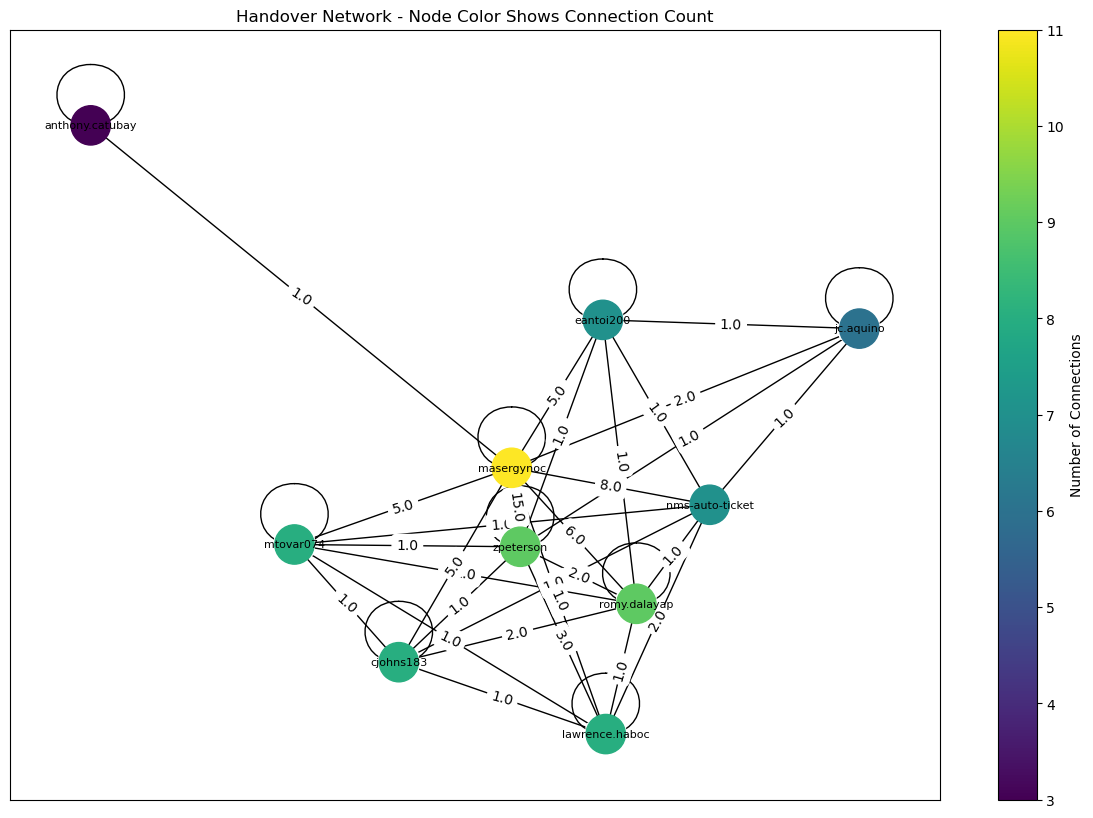

In [137]:
import matplotlib.colors as mcolors

# Calculate node degrees (number of connections)
degrees = dict(G.degree())

# Create color map based on degree
vmin = min(degrees.values())
vmax = max(degrees.values())
cmap = plt.cm.viridis  # Choose colormap (try 'YlOrRd', 'plasma', 'coolwarm')

# Draw network with colored nodes
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G)

nodes = nx.draw_networkx_nodes(G, pos,
                             node_color=list(degrees.values()),
                             node_size=800,
                             cmap=cmap,
                             vmin=vmin,
                             vmax=vmax)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

# Add colorbar legend
plt.colorbar(nodes, label='Number of Connections')
plt.title('Handover Network - Node Color Shows Connection Count')
plt.show()

### Social Network Analysis of JIRA Ticket Handovers

* The weights in the network represent the frequency or strength of handovers between resources.
* A weight of 0.001 indicates that 0.1% of all handovers occur between these two resources.
* Higher weights (e.g., 0.05 or 5%) suggest frequent collaboration or handovers between those resources.
* Lower weights (e.g., 0.002 or 0.2%) indicate less frequent interactions.
This chart provides a clearer picture of the relative importance of different handover relationships in your JIRA ticket process, helping identify key collaborations and potential bottlenecks in the workflow.

## Creating Custom Process Maps

Custom process maps allow for tailored visualizations of your JIRA ticket workflow, highlighting specific aspects of interest. Here's how to create insightful custom process maps:

* Define Activities of Interest: Select key activities from your event log that you want to focus on.
* Filter the Event Log: Create a filtered log containing only the selected activities.


In [74]:
from pm4py import filter_event_attribute_values
activities_of_interest = ['Ticket Created', 'Ticket Assigned', 'Ticket In Progress', 'Ticket Resolved']
filtered_log = filter_event_attribute_values(event_log, 'concept:name', activities_of_interest)

* Generate a Custom Directly-Follows Graph: Use the filtered log to create a DFG focused on your activities of interest.

In [75]:
custom_dfg = discover_directly_follows_graph(filtered_log)

* Enhance with Performance Metrics: Add performance information to your custom process map.

In [76]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.util import xes_constants as xes

# Ensure timestamps are in the correct format
for trace in filtered_log:
    for event in trace:
        if xes.DEFAULT_TIMESTAMP_KEY in event:
            event[xes.DEFAULT_TIMESTAMP_KEY] = pd.to_datetime(event[xes.DEFAULT_TIMESTAMP_KEY])

# Now apply the performance discovery
perf_dfg = dfg_discovery.apply(filtered_log, variant=dfg_discovery.Variants.PERFORMANCE)


* Visualize the Custom Process Map: Create a visual representation of your custom process map.

In [77]:
from pm4py.visualization.dfg import visualizer as dfg_visualizer
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

# Capture all returned values
dfg_output = dfg_discovery.apply(filtered_log)
custom_dfg = dfg_output  # The DFG is typically the first element


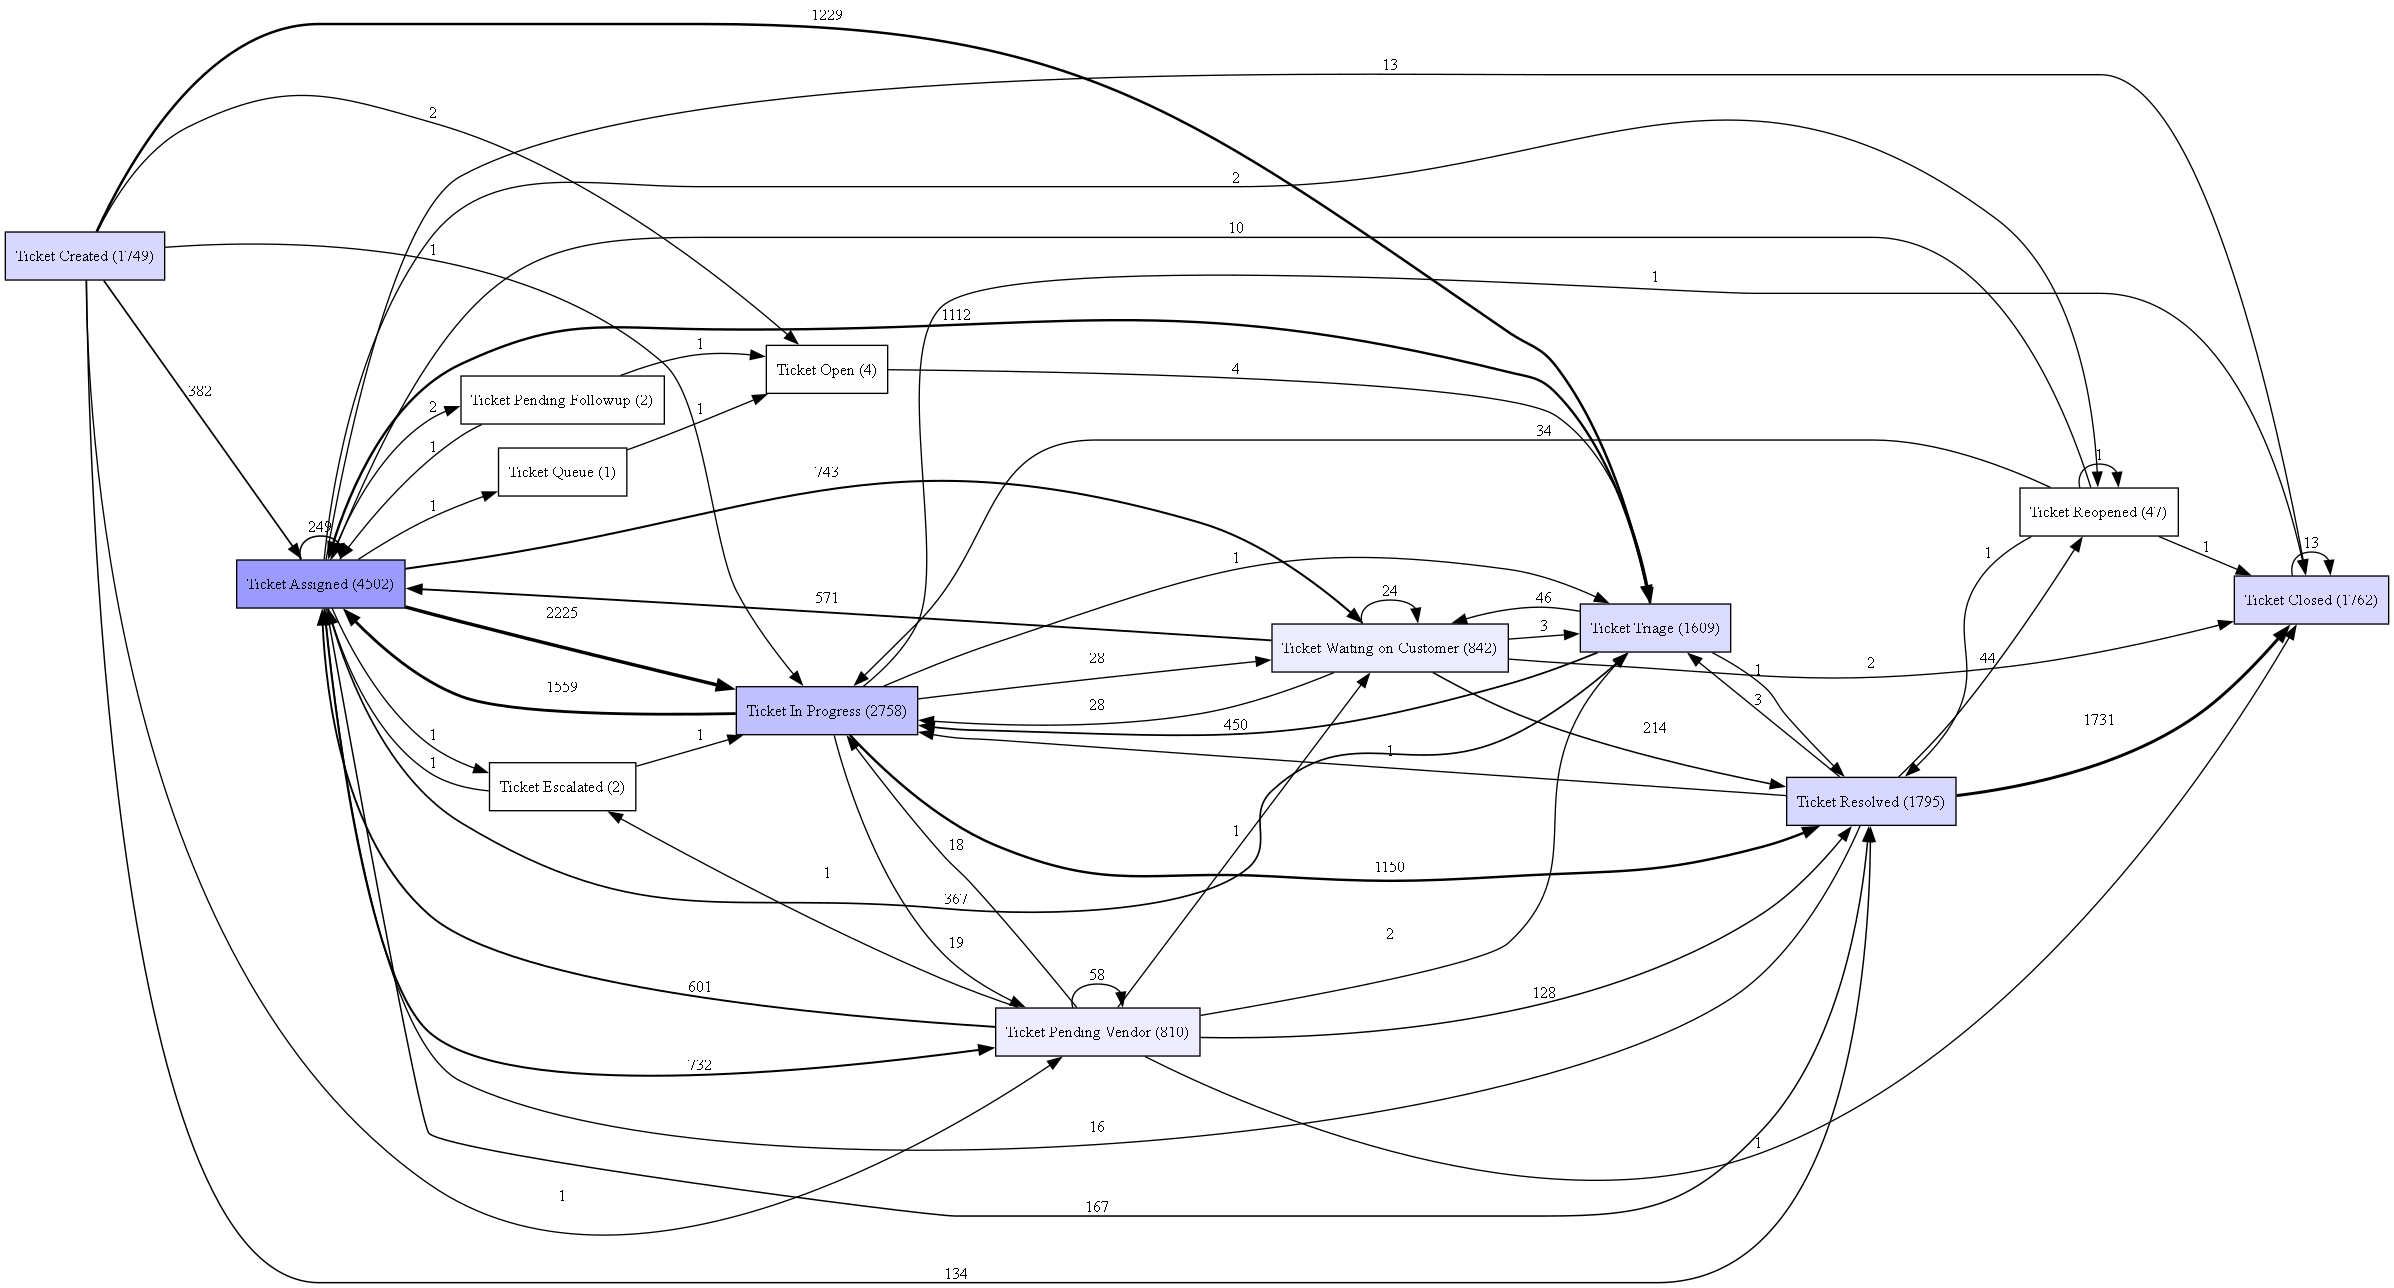

In [78]:
# Now visualize
gviz = dfg_visualizer.apply(custom_dfg, log=filtered_log, variant=dfg_visualizer.Variants.FREQUENCY, parameters={"format": "png"})
dfg_visualizer.view(gviz)

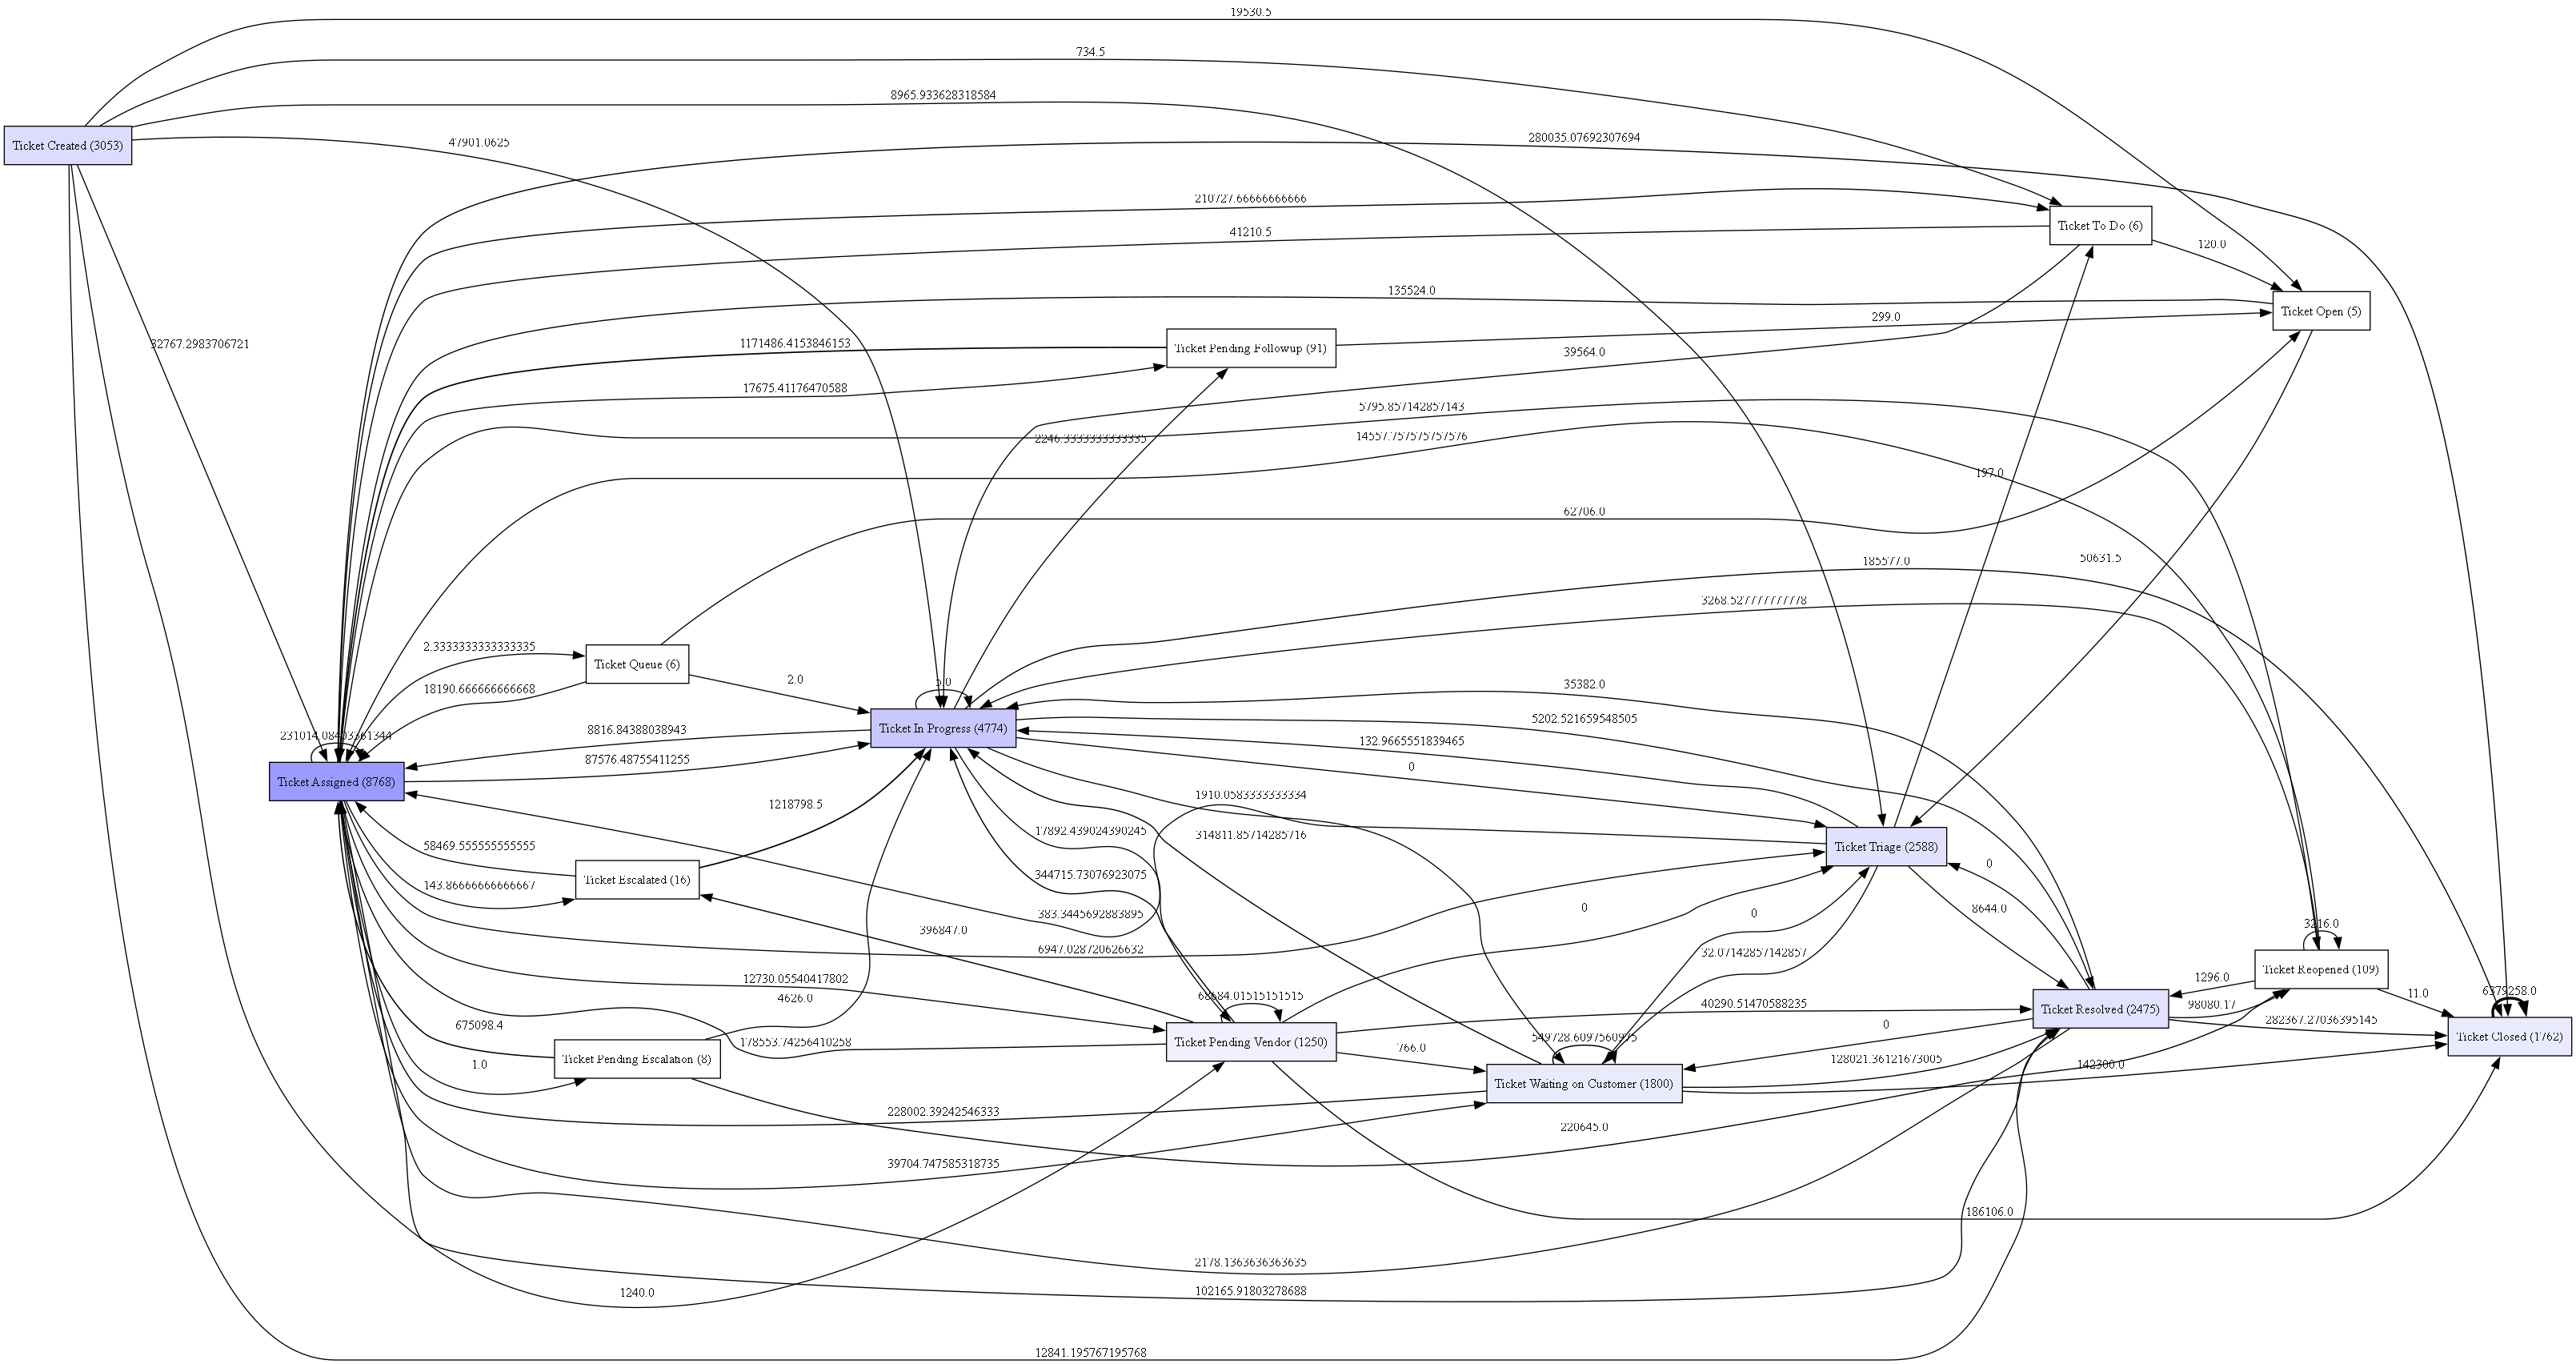

In [171]:
# perf_dfg = dfg_discovery.apply(filtered_log, variant=dfg_discovery.Variants.PERFORMANCE)
# Now visualize
gviz = dfg_visualizer.apply(perf_dfg, log=filtered_log, variant=dfg_visualizer.Variants.FREQUENCY, parameters={"format": "png"})
dfg_visualizer.view(gviz)

The graph generated from this code represents a Directly-Follows Graph (DFG) with frequency information. Here's how to interpret it:

* Nodes: Each node represents an activity in your process.

* Edges: Arrows between nodes show the flow of activities, indicating which activities directly follow others.

* Edge thickness: Thicker edges indicate more frequent transitions between activities.

* Node size: Larger nodes typically represent activities that occur more frequently in the process.

* Colors: Often, colors are used to highlight different aspects of the process, such as start activities (green) and end activities (orange).

* Numbers on edges: These represent the frequency of transitions between activities.

* Numbers in nodes: These often show how many times each activity occurs in the log.

This visualization provides a clear overview of your process flow, highlighting common paths and potential bottlenecks. It's particularly useful for identifying the most frequent activity sequences and understanding the overall structure of your process.

## Identifying improvement opportunities

Analyzing the process mining results from our JIRA ticket data reveals several areas for potential improvement:

#### Bottleneck Activities:

* Examine activities with high processing times in the performance DFG.
* Focus on reducing time spent in these activities to improve overall process efficiency.

#### Frequent Handovers:

* Analyze the social network graph to identify resources with numerous handovers.
* Consider streamlining workflows or cross-training team members to reduce unnecessary handovers.

#### Variant Analysis:

* Identify the most common process variants and compare them to less frequent ones.
* Standardize processes based on efficient variants to improve overall performance.

#### Rework Loops:

* Look for cycles in the process map, particularly involving 'Ticket Reopened' events.
* Investigate root causes of rework and implement measures to reduce ticket reopening.

#### Resource Utilization:

* Use the social network analysis to identify overloaded or underutilized resources.
* Balance workload distribution to optimize resource allocation.

#### Time Gap Analysis:

* Examine the temporal profile to identify long waiting times between activities.
* Implement strategies to reduce waiting times and improve overall process flow.

#### Start-to-End Time Optimization:

* Analyze the total time from ticket creation to resolution.
* Set performance targets based on efficient process instances and work towards reducing overall cycle time.



### Interpreting Process Mining Results in Context

Understanding the JIRA Workflow: Align the discovered process models with your organization's defined JIRA workflow. The directly-follows graphs and Petri nets reveal actual process execution, which may differ from the intended workflow. Use this insight to identify deviations and potential process improvements.

Resource Behavior Analysis: Interpret the social network analysis results in light of your team structure. High centrality measures might indicate key personnel or potential bottlenecks. Consider team dynamics, roles, and responsibilities when analyzing handover patterns.

Performance Metrics in Business Context: Relate time-based metrics from the performance directly-follows graph to your service level agreements (SLAs) and key performance indicators (KPIs). This connection helps prioritize improvement efforts on activities that significantly impact overall process performance.

Variant Analysis for Process Standardization: Examine process variants in relation to ticket types or project categories. Frequent variants may suggest standardization opportunities, while less common paths might indicate exceptional cases requiring special handling.

Temporal Patterns and Workload Distribution: Use temporal profile analysis to understand workload distribution over time. Correlate these patterns with business cycles, release schedules, or support tier structures to optimize resource allocation and improve response times.

Compliance and Governance: Evaluate the discovered process against compliance requirements and governance policies. Identify any deviations that may require attention or process adjustments to ensure adherence to organizational standards.

Continuous Improvement Cycle: View the process mining results as part of a continuous improvement cycle. Use insights gained to implement changes, then re-analyze to measure the impact of these improvements over time.

By interpreting process mining results within the broader context of your organization's goals, structure, and operational environment, you can derive meaningful insights that drive effective process optimization and enhance overall JIRA ticket management efficiency.

### Avoiding common pitfalls in process analysis

Avoiding Common Pitfalls in Process Analysis

Data Quality Assurance: Ensure your event log is clean and consistent. In our JIRA data, we've handled 'nan' values and standardized timestamps. Always validate data quality before analysis to prevent misleading results.

Appropriate Filtering: Use filtering judiciously. We've filtered activities of interest and applied thresholds in our social network analysis. Be cautious not to over-filter, which might hide important process variations.

Context Consideration: Remember that process mining results don't tell the whole story. Complement your analysis with domain knowledge about JIRA ticket handling processes and organizational context.

Avoiding Overgeneralization: Be cautious about drawing broad conclusions from limited data. Our analysis covers a specific period; consider how representative this is of long-term processes.

Performance Metric Selection: Choose appropriate performance metrics. We've used frequency and time-based measures. Ensure selected metrics align with your process improvement goals.

Handling Process Variants: Don't ignore less frequent process variants. While we've focused on common paths, rare variants might offer insights into exceptional cases or process flexibility needs.

Balancing Complexity and Simplicity: Strike a balance in visualization complexity. Our custom process maps focus on key activities to avoid overwhelming detail while still providing valuable insights.

Continuous Validation: Regularly validate your process models against new data. As JIRA processes evolve, ensure your analysis remains relevant and accurate.

By avoiding these common pitfalls, you can enhance the reliability and effectiveness of your process analysis, leading to more impactful improvements in your JIRA ticket handling processes.
